In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
filespath = []
import os
for dirname, _, filenames in os.walk('images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        filespath.append(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

images/test/angry/Anger.jpg
images/test/disgust/Disgust.jpg
images/test/fear/Fear.jpg
images/test/happy/Happy.jpg
images/test/neutral/Neutral.jpg
images/test/sad/Sad.jpg
images/test/surprise/Surprised.jpg
images/train/angry/0.jpg
images/train/angry/00a7cb9cf18d3a015a9e932952f942fd4bcad8044bcef5e0c05de51d~angry.jpg
images/train/angry/00b7e4551ffa57ff4e2311b2ce156a6c964c642abcacff6920bba177~angry.jpg
images/train/angry/0118d3f7d8cbda624679c102f3a09282a7a73018d6fcd1e492a8c5f9~angry.jpg
images/train/angry/016e982434c5ffc7ee2fdc353befd030a420183dcb9b323d61458bc9~angry.jpg
images/train/angry/01b4484e9f51114bbdaceb1e6b3d00f2708dc04831f051e468200249~angry.jpg
images/train/angry/02bc9437f479433dd373fd91f024bea7751f22504f4be12bfd31cf3d~angry.jpg
images/train/angry/02f48695d0888b9c0f14dd7bf81d12baac81f4fb6717c3c84421c7be~angry.jpg
images/train/angry/03a1406d10206dcb781bb9861b5e483a9f921eab92470374e24b934e~angry.png
images/train/angry/03fe5bcebc12a0285ed15485e73e4c27b5c86801d2e0e0ddd9de055b~angry.

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras

# visualize some data ramdomly from out dataset

IndexError: list index out of range

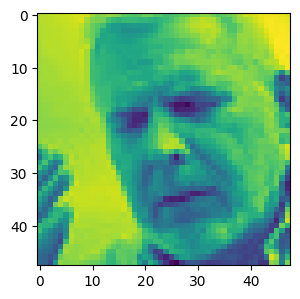

In [6]:
plt.figure(figsize=(15,10))
for i in range(8):
    plt.subplot(2,4,i+1)
    path = np.random.choice(filespath)
    im = plt.imread(path)
    plt.imshow(im)
    emo=path.split("/")
    plt.title(emo[5])
plt.tight_layout()

let's look distribution of data in a pythonic way

In [7]:
listOfemo = []
for path in filespath:
    emo = path.split("/")
    emot = emo[5]
    listOfemo.append(emot)

IndexError: list index out of range

In [5]:
uniq = dict()
unique = set(listOfemo)
for uni in unique:
    number = listOfemo.count(uni)
    uniq[uni]=number

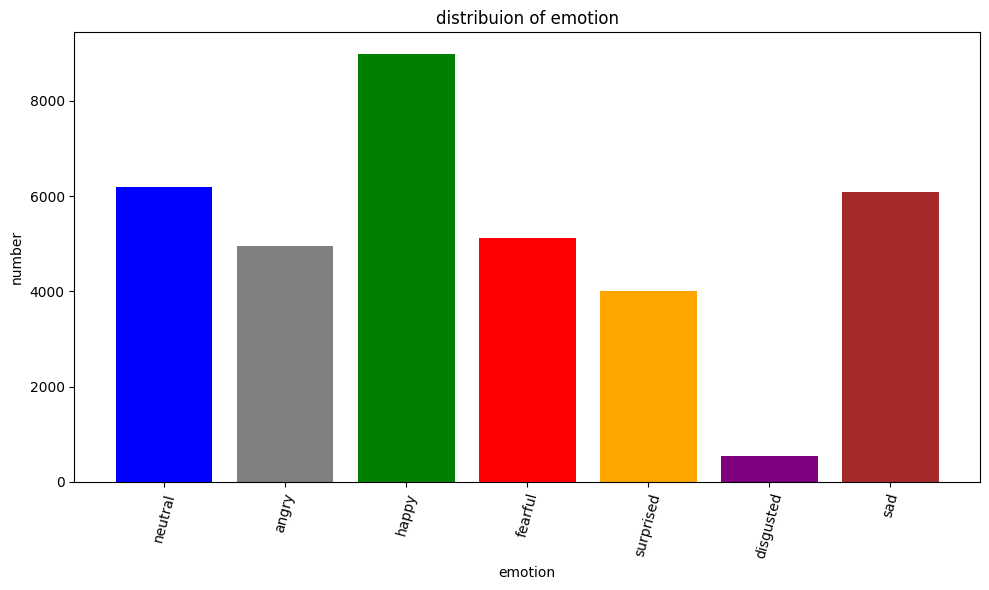

In [6]:
plt.figure(figsize=(10,6))
plt.bar(list(uniq.keys()), list(uniq.values()), color=['blue', 'gray', 'green', 'red', 'orange', 'purple', 'brown'])
plt.xlabel('emotion')
plt.ylabel('number')
plt.title('distribuion of emotion')
plt.xticks(rotation=75) 
plt.tight_layout() 

#  let's get data ready

In [8]:
train_path = "images/train"
valid_path = "images/test"

In [9]:
trainData = keras.preprocessing.image_dataset_from_directory(train_path,label_mode="categorical",batch_size=32,image_size=(224, 224))
validData = keras.preprocessing.image_dataset_from_directory(valid_path,label_mode="categorical",batch_size=32,image_size=(224, 224))

Found 48531 files belonging to 7 classes.


2024-03-20 04:01:31.423790: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 04:01:31.450971: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 04:01:31.451022: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 04:01:31.452763: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-20 04:01:31.452814: I external/local_xla/xla/stream_executor

Found 7 files belonging to 7 classes.


set gloabal mixed precison to accelarete

In [10]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")
mixed_precision.global_policy()

<FloatDTypePolicy "mixed_float16">

# let's go to code 🏇🏇🏇

firts of all let define a sequentiel augmentation model 

In [11]:
data_augment = keras.Sequential([                                  
  keras.layers.RandomTranslation(height_factor=.2,width_factor=.2),
  keras.layers.RandomContrast(.2),
  keras.layers.RandomFlip('horizontal'),
  keras.layers.RandomRotation(.25),
  keras.layers.RandomZoom(.2),
], name='data_augment')

take base model from tensorflow hub, so do not forget importing hub

In [12]:
basemodel = tf.keras.applications.efficientnet_v2.EfficientNetV2B3(include_top=False)
basemodel.trainable = True

2024-03-20 04:01:32.625516: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


52606240/52606240 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [13]:
for layer in basemodel.layers[:-11]:
    layer.trainable = False
for layer in basemodel.layers:
    print(layer.name,layer.trainable)

input_layer False
rescaling False
normalization False
stem_conv False
stem_bn False
stem_activation False
block1a_project_conv False
block1a_project_bn False
block1a_project_activation False
block1b_project_conv False
block1b_project_bn False
block1b_project_activation False
block1b_drop False
block1b_add False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_project_conv False
block2b_project_bn False
block2b_drop False
block2b_add False
block2c_expand_conv False
block2c_expand_bn False
block2c_expand_activation False
block2c_project_conv False
block2c_project_bn False
block2c_drop False
block2c_add False
block3a_expand_conv False
block3a_expand_bn False
block3a_expand_activation False
block3a_project_conv False
block3a_project_bn False
block3b_expand_conv False
block3b_expand_bn False
block3b_expand_activation F

let's build all of the model, and compile it

In [14]:
inputLayer = keras.Input(shape=(224,224,3),name="input_layer")
data_augment_layer = data_augment(inputLayer)
base_model_enter_layer = basemodel(data_augment_layer)
x_model = keras.layers.GlobalAveragePooling2D(name="global_avarage_pooling_layer")(base_model_enter_layer)
x_model = keras.layers.Dense(512,activation="relu")(x_model)
x_model = keras.layers.Dropout(0.15)(x_model)
x_model = keras.layers.Dense(512,activation="relu")(x_model)
x_model = keras.layers.Dropout(0.20)(x_model)
x_model = keras.layers.Dense(256,activation="relu")(x_model)
x_model = keras.layers.Dropout(0.25)(x_model)
x_model = keras.layers.Dense(256,activation="relu")(x_model)
x_model = keras.layers.Activation(keras.activations.relu)(x_model)
outputLayer = keras.layers.Dense(7,activation="softmax")(x_model)
model_emo = keras.Model(inputLayer,
           outputLayer)
model_emo.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

It is ready to fit

In [18]:
import warnings
warnings.filterwarnings("ignore", message="could not open file to read NUMA node")
warnings.filterwarnings("ignore", message="PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG")
warnings.filterwarnings("ignore", message="PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG")
histort_emo = model_emo.fit(trainData,
             steps_per_epoch=int(len(trainData)),
             epochs=15,
             validation_data=validData,
             validation_steps=int(len(validData)))            

Epoch 1/15
   1/1517 ━━━━━━━━━━━━━━━━━━━━ 22:46 901ms/step - accuracy: 0.5625 - loss: 1.2175

2024-03-20 04:10:35.968402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:10:35.976663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  42/1517 ━━━━━━━━━━━━━━━━━━━━ 4:52 198ms/step - accuracy: 0.5124 - loss: 1.3318

2024-03-20 04:10:44.078690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  46/1517 ━━━━━━━━━━━━━━━━━━━━ 4:50 198ms/step - accuracy: 0.5121 - loss: 1.3322

2024-03-20 04:10:44.857536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  51/1517 ━━━━━━━━━━━━━━━━━━━━ 4:49 197ms/step - accuracy: 0.5114 - loss: 1.3329

2024-03-20 04:10:45.993345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  88/1517 ━━━━━━━━━━━━━━━━━━━━ 4:40 196ms/step - accuracy: 0.5103 - loss: 1.3279

2024-03-20 04:10:53.010294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  89/1517 ━━━━━━━━━━━━━━━━━━━━ 4:39 196ms/step - accuracy: 0.5103 - loss: 1.3278

2024-03-20 04:10:53.227282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 108/1517 ━━━━━━━━━━━━━━━━━━━━ 4:35 196ms/step - accuracy: 0.5099 - loss: 1.3265

2024-03-20 04:10:56.884572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 128/1517 ━━━━━━━━━━━━━━━━━━━━ 4:32 196ms/step - accuracy: 0.5095 - loss: 1.3258

2024-03-20 04:11:00.857888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 133/1517 ━━━━━━━━━━━━━━━━━━━━ 4:31 196ms/step - accuracy: 0.5094 - loss: 1.3257

2024-03-20 04:11:01.809088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 153/1517 ━━━━━━━━━━━━━━━━━━━━ 4:27 196ms/step - accuracy: 0.5090 - loss: 1.3257

2024-03-20 04:11:05.773546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 157/1517 ━━━━━━━━━━━━━━━━━━━━ 4:27 196ms/step - accuracy: 0.5088 - loss: 1.3257

2024-03-20 04:11:06.607086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 162/1517 ━━━━━━━━━━━━━━━━━━━━ 4:25 196ms/step - accuracy: 0.5087 - loss: 1.3257

2024-03-20 04:11:07.574469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 176/1517 ━━━━━━━━━━━━━━━━━━━━ 4:23 197ms/step - accuracy: 0.5084 - loss: 1.3257

2024-03-20 04:11:10.360518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 186/1517 ━━━━━━━━━━━━━━━━━━━━ 4:22 197ms/step - accuracy: 0.5081 - loss: 1.3257

2024-03-20 04:11:12.441110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 193/1517 ━━━━━━━━━━━━━━━━━━━━ 4:21 198ms/step - accuracy: 0.5080 - loss: 1.3256

2024-03-20 04:11:13.937312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 212/1517 ━━━━━━━━━━━━━━━━━━━━ 4:17 197ms/step - accuracy: 0.5076 - loss: 1.3258

2024-03-20 04:11:17.607644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 238/1517 ━━━━━━━━━━━━━━━━━━━━ 4:13 198ms/step - accuracy: 0.5071 - loss: 1.3259

2024-03-20 04:11:22.886052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 280/1517 ━━━━━━━━━━━━━━━━━━━━ 4:06 199ms/step - accuracy: 0.5061 - loss: 1.3260

2024-03-20 04:11:31.516416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 300/1517 ━━━━━━━━━━━━━━━━━━━━ 4:02 200ms/step - accuracy: 0.5056 - loss: 1.3261

2024-03-20 04:11:35.653390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 316/1517 ━━━━━━━━━━━━━━━━━━━━ 4:00 200ms/step - accuracy: 0.5052 - loss: 1.3262

2024-03-20 04:11:38.995926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 335/1517 ━━━━━━━━━━━━━━━━━━━━ 3:57 201ms/step - accuracy: 0.5048 - loss: 1.3264

2024-03-20 04:11:42.912217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 339/1517 ━━━━━━━━━━━━━━━━━━━━ 3:56 201ms/step - accuracy: 0.5047 - loss: 1.3264

2024-03-20 04:11:43.786860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 355/1517 ━━━━━━━━━━━━━━━━━━━━ 3:53 201ms/step - accuracy: 0.5043 - loss: 1.3266

2024-03-20 04:11:47.354218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 380/1517 ━━━━━━━━━━━━━━━━━━━━ 3:49 202ms/step - accuracy: 0.5038 - loss: 1.3268

2024-03-20 04:11:52.447353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 421/1517 ━━━━━━━━━━━━━━━━━━━━ 3:41 202ms/step - accuracy: 0.5029 - loss: 1.3270

2024-03-20 04:12:00.861936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 449/1517 ━━━━━━━━━━━━━━━━━━━━ 3:36 203ms/step - accuracy: 0.5025 - loss: 1.3271

2024-03-20 04:12:06.776965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 454/1517 ━━━━━━━━━━━━━━━━━━━━ 3:35 203ms/step - accuracy: 0.5024 - loss: 1.3271

2024-03-20 04:12:07.796331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 482/1517 ━━━━━━━━━━━━━━━━━━━━ 3:29 203ms/step - accuracy: 0.5021 - loss: 1.3270

2024-03-20 04:12:13.482507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 483/1517 ━━━━━━━━━━━━━━━━━━━━ 3:29 203ms/step - accuracy: 0.5021 - loss: 1.3270

2024-03-20 04:12:13.714008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 506/1517 ━━━━━━━━━━━━━━━━━━━━ 3:25 203ms/step - accuracy: 0.5018 - loss: 1.3268

2024-03-20 04:12:18.452686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 525/1517 ━━━━━━━━━━━━━━━━━━━━ 3:21 203ms/step - accuracy: 0.5016 - loss: 1.3268

2024-03-20 04:12:22.326640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 537/1517 ━━━━━━━━━━━━━━━━━━━━ 3:19 203ms/step - accuracy: 0.5015 - loss: 1.3267

2024-03-20 04:12:24.919539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 552/1517 ━━━━━━━━━━━━━━━━━━━━ 3:16 204ms/step - accuracy: 0.5013 - loss: 1.3267

2024-03-20 04:12:28.319244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:12:28.351531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 564/1517 ━━━━━━━━━━━━━━━━━━━━ 3:14 204ms/step - accuracy: 0.5012 - loss: 1.3267

2024-03-20 04:12:30.715488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 596/1517 ━━━━━━━━━━━━━━━━━━━━ 3:08 204ms/step - accuracy: 0.5009 - loss: 1.3266

2024-03-20 04:12:37.463468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 617/1517 ━━━━━━━━━━━━━━━━━━━━ 3:03 204ms/step - accuracy: 0.5007 - loss: 1.3265

2024-03-20 04:12:41.823833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 635/1517 ━━━━━━━━━━━━━━━━━━━━ 3:00 205ms/step - accuracy: 0.5005 - loss: 1.3265

2024-03-20 04:12:45.622029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 641/1517 ━━━━━━━━━━━━━━━━━━━━ 2:59 205ms/step - accuracy: 0.5005 - loss: 1.3265

2024-03-20 04:12:46.855515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:12:46.855947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 642/1517 ━━━━━━━━━━━━━━━━━━━━ 2:59 205ms/step - accuracy: 0.5005 - loss: 1.3265

2024-03-20 04:12:47.065903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 645/1517 ━━━━━━━━━━━━━━━━━━━━ 2:58 205ms/step - accuracy: 0.5004 - loss: 1.3265

2024-03-20 04:12:47.760586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 671/1517 ━━━━━━━━━━━━━━━━━━━━ 2:53 205ms/step - accuracy: 0.5001 - loss: 1.3266

2024-03-20 04:12:53.382758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 676/1517 ━━━━━━━━━━━━━━━━━━━━ 2:52 205ms/step - accuracy: 0.5001 - loss: 1.3266

2024-03-20 04:12:54.439310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 678/1517 ━━━━━━━━━━━━━━━━━━━━ 2:52 205ms/step - accuracy: 0.5001 - loss: 1.3266

2024-03-20 04:12:54.841297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 686/1517 ━━━━━━━━━━━━━━━━━━━━ 2:50 205ms/step - accuracy: 0.5000 - loss: 1.3266

2024-03-20 04:12:56.535294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 699/1517 ━━━━━━━━━━━━━━━━━━━━ 2:47 205ms/step - accuracy: 0.4999 - loss: 1.3266

2024-03-20 04:12:59.263229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 762/1517 ━━━━━━━━━━━━━━━━━━━━ 2:35 206ms/step - accuracy: 0.4994 - loss: 1.3266

2024-03-20 04:13:12.812841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:13:12.854570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 767/1517 ━━━━━━━━━━━━━━━━━━━━ 2:34 206ms/step - accuracy: 0.4993 - loss: 1.3266

2024-03-20 04:13:13.917427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 782/1517 ━━━━━━━━━━━━━━━━━━━━ 2:31 206ms/step - accuracy: 0.4992 - loss: 1.3266

2024-03-20 04:13:17.105924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 790/1517 ━━━━━━━━━━━━━━━━━━━━ 2:30 206ms/step - accuracy: 0.4992 - loss: 1.3266

2024-03-20 04:13:18.812094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 801/1517 ━━━━━━━━━━━━━━━━━━━━ 2:27 207ms/step - accuracy: 0.4991 - loss: 1.3266

2024-03-20 04:13:21.190653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 806/1517 ━━━━━━━━━━━━━━━━━━━━ 2:26 207ms/step - accuracy: 0.4991 - loss: 1.3266

2024-03-20 04:13:22.254108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 816/1517 ━━━━━━━━━━━━━━━━━━━━ 2:24 207ms/step - accuracy: 0.4991 - loss: 1.3265

2024-03-20 04:13:24.295039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:13:24.357265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 830/1517 ━━━━━━━━━━━━━━━━━━━━ 2:21 207ms/step - accuracy: 0.4990 - loss: 1.3265

2024-03-20 04:13:27.194202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 850/1517 ━━━━━━━━━━━━━━━━━━━━ 2:17 207ms/step - accuracy: 0.4989 - loss: 1.3264

2024-03-20 04:13:31.362736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 863/1517 ━━━━━━━━━━━━━━━━━━━━ 2:15 207ms/step - accuracy: 0.4989 - loss: 1.3263

2024-03-20 04:13:34.065158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 887/1517 ━━━━━━━━━━━━━━━━━━━━ 2:10 207ms/step - accuracy: 0.4988 - loss: 1.3262

2024-03-20 04:13:39.023189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 893/1517 ━━━━━━━━━━━━━━━━━━━━ 2:08 207ms/step - accuracy: 0.4987 - loss: 1.3262

2024-03-20 04:13:40.305865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 897/1517 ━━━━━━━━━━━━━━━━━━━━ 2:08 207ms/step - accuracy: 0.4987 - loss: 1.3262

2024-03-20 04:13:41.132123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 905/1517 ━━━━━━━━━━━━━━━━━━━━ 2:06 207ms/step - accuracy: 0.4987 - loss: 1.3261

2024-03-20 04:13:42.799765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 939/1517 ━━━━━━━━━━━━━━━━━━━━ 1:59 207ms/step - accuracy: 0.4986 - loss: 1.3259

2024-03-20 04:13:49.815185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 962/1517 ━━━━━━━━━━━━━━━━━━━━ 1:54 207ms/step - accuracy: 0.4985 - loss: 1.3258

2024-03-20 04:13:54.769357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 991/1517 ━━━━━━━━━━━━━━━━━━━━ 1:48 207ms/step - accuracy: 0.4984 - loss: 1.3257

2024-03-20 04:14:01.063120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1031/1517 ━━━━━━━━━━━━━━━━━━━━ 1:40 208ms/step - accuracy: 0.4983 - loss: 1.3255

2024-03-20 04:14:09.885508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1037/1517 ━━━━━━━━━━━━━━━━━━━━ 1:39 208ms/step - accuracy: 0.4983 - loss: 1.3255

2024-03-20 04:14:11.224101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1053/1517 ━━━━━━━━━━━━━━━━━━━━ 1:36 208ms/step - accuracy: 0.4983 - loss: 1.3254

2024-03-20 04:14:14.787594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1064/1517 ━━━━━━━━━━━━━━━━━━━━ 1:34 208ms/step - accuracy: 0.4983 - loss: 1.3253

2024-03-20 04:14:17.213764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1091/1517 ━━━━━━━━━━━━━━━━━━━━ 1:28 208ms/step - accuracy: 0.4982 - loss: 1.3252

2024-03-20 04:14:23.371486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1117/1517 ━━━━━━━━━━━━━━━━━━━━ 1:23 209ms/step - accuracy: 0.4982 - loss: 1.3250

2024-03-20 04:14:28.999210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1121/1517 ━━━━━━━━━━━━━━━━━━━━ 1:22 209ms/step - accuracy: 0.4982 - loss: 1.3250

2024-03-20 04:14:29.877108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1129/1517 ━━━━━━━━━━━━━━━━━━━━ 1:21 209ms/step - accuracy: 0.4981 - loss: 1.3249

2024-03-20 04:14:31.617125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1141/1517 ━━━━━━━━━━━━━━━━━━━━ 1:18 209ms/step - accuracy: 0.4981 - loss: 1.3249

2024-03-20 04:14:34.224682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1167/1517 ━━━━━━━━━━━━━━━━━━━━ 1:13 210ms/step - accuracy: 0.4981 - loss: 1.3247

2024-03-20 04:14:40.291377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1178/1517 ━━━━━━━━━━━━━━━━━━━━ 1:11 210ms/step - accuracy: 0.4981 - loss: 1.3247

2024-03-20 04:14:42.841398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1184/1517 ━━━━━━━━━━━━━━━━━━━━ 1:09 210ms/step - accuracy: 0.4981 - loss: 1.3247

2024-03-20 04:14:44.130133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1195/1517 ━━━━━━━━━━━━━━━━━━━━ 1:07 210ms/step - accuracy: 0.4980 - loss: 1.3246

2024-03-20 04:14:46.607388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1209/1517 ━━━━━━━━━━━━━━━━━━━━ 1:04 210ms/step - accuracy: 0.4980 - loss: 1.3246

2024-03-20 04:14:49.643135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1222/1517 ━━━━━━━━━━━━━━━━━━━━ 1:01 210ms/step - accuracy: 0.4980 - loss: 1.3245

2024-03-20 04:14:52.443147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1228/1517 ━━━━━━━━━━━━━━━━━━━━ 1:00 210ms/step - accuracy: 0.4980 - loss: 1.3245

2024-03-20 04:14:53.808054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1234/1517 ━━━━━━━━━━━━━━━━━━━━ 59s 210ms/step - accuracy: 0.4980 - loss: 1.3244

2024-03-20 04:14:55.316199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1263/1517 ━━━━━━━━━━━━━━━━━━━━ 53s 211ms/step - accuracy: 0.4979 - loss: 1.3243

2024-03-20 04:15:01.740816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1278/1517 ━━━━━━━━━━━━━━━━━━━━ 50s 211ms/step - accuracy: 0.4979 - loss: 1.3243

2024-03-20 04:15:05.411434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1281/1517 ━━━━━━━━━━━━━━━━━━━━ 49s 211ms/step - accuracy: 0.4979 - loss: 1.3243

2024-03-20 04:15:05.911858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1288/1517 ━━━━━━━━━━━━━━━━━━━━ 48s 211ms/step - accuracy: 0.4979 - loss: 1.3242

2024-03-20 04:15:07.732772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1336/1517 ━━━━━━━━━━━━━━━━━━━━ 38s 212ms/step - accuracy: 0.4979 - loss: 1.3241

2024-03-20 04:15:18.622996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:15:18.749424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1343/1517 ━━━━━━━━━━━━━━━━━━━━ 36s 212ms/step - accuracy: 0.4979 - loss: 1.3240

2024-03-20 04:15:20.330339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1351/1517 ━━━━━━━━━━━━━━━━━━━━ 35s 212ms/step - accuracy: 0.4979 - loss: 1.3240

2024-03-20 04:15:22.008232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1355/1517 ━━━━━━━━━━━━━━━━━━━━ 34s 212ms/step - accuracy: 0.4979 - loss: 1.3240

2024-03-20 04:15:22.828113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1361/1517 ━━━━━━━━━━━━━━━━━━━━ 33s 212ms/step - accuracy: 0.4979 - loss: 1.3239

2024-03-20 04:15:24.152330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1378/1517 ━━━━━━━━━━━━━━━━━━━━ 29s 212ms/step - accuracy: 0.4978 - loss: 1.3239

2024-03-20 04:15:27.890510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1380/1517 ━━━━━━━━━━━━━━━━━━━━ 29s 212ms/step - accuracy: 0.4978 - loss: 1.3238

2024-03-20 04:15:28.336908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1412/1517 ━━━━━━━━━━━━━━━━━━━━ 22s 212ms/step - accuracy: 0.4978 - loss: 1.3237

2024-03-20 04:15:35.635148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1413/1517 ━━━━━━━━━━━━━━━━━━━━ 22s 212ms/step - accuracy: 0.4978 - loss: 1.3237

2024-03-20 04:15:35.909698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1423/1517 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 0.4978 - loss: 1.3237

2024-03-20 04:15:38.445424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1434/1517 ━━━━━━━━━━━━━━━━━━━━ 17s 213ms/step - accuracy: 0.4978 - loss: 1.3236

2024-03-20 04:15:41.031717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1453/1517 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.4978 - loss: 1.3235

2024-03-20 04:15:45.405879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1460/1517 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.4978 - loss: 1.3235

2024-03-20 04:15:46.838456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1480/1517 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.4978 - loss: 1.3234

2024-03-20 04:15:51.710868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1484/1517 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.4978 - loss: 1.3234

2024-03-20 04:15:52.597195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:15:52.597333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1517/1517 ━━━━━━━━━━━━━━━━━━━━ 332s 218ms/step - accuracy: 0.4978 - loss: 1.3233 - val_accuracy: 0.1429 - val_loss: 2.2606
Epoch 2/15


2024-03-20 04:16:07.285704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:16:07.286067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-20 04:16:07.341697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:16:07.341991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is abortin

1517/1517 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/15
   1/1517 ━━━━━━━━━━━━━━━━━━━━ 20:59 831ms/step - accuracy: 0.5000 - loss: 1.2406

2024-03-20 04:16:08.387100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:16:08.398753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  42/1517 ━━━━━━━━━━━━━━━━━━━━ 5:05 207ms/step - accuracy: 0.5319 - loss: 1.2511

2024-03-20 04:16:16.860355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  46/1517 ━━━━━━━━━━━━━━━━━━━━ 5:04 207ms/step - accuracy: 0.5322 - loss: 1.2522

2024-03-20 04:16:17.670073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  52/1517 ━━━━━━━━━━━━━━━━━━━━ 5:03 207ms/step - accuracy: 0.5327 - loss: 1.2537

2024-03-20 04:16:18.915618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  88/1517 ━━━━━━━━━━━━━━━━━━━━ 5:05 213ms/step - accuracy: 0.5337 - loss: 1.2552

2024-03-20 04:16:26.907715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  89/1517 ━━━━━━━━━━━━━━━━━━━━ 5:04 213ms/step - accuracy: 0.5337 - loss: 1.2551

2024-03-20 04:16:27.188049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 107/1517 ━━━━━━━━━━━━━━━━━━━━ 5:01 214ms/step - accuracy: 0.5337 - loss: 1.2535

2024-03-20 04:16:31.203178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 128/1517 ━━━━━━━━━━━━━━━━━━━━ 4:58 215ms/step - accuracy: 0.5332 - loss: 1.2532

2024-03-20 04:16:35.732424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 133/1517 ━━━━━━━━━━━━━━━━━━━━ 4:59 216ms/step - accuracy: 0.5328 - loss: 1.2535

2024-03-20 04:16:36.908255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 153/1517 ━━━━━━━━━━━━━━━━━━━━ 4:57 218ms/step - accuracy: 0.5320 - loss: 1.2533

2024-03-20 04:16:41.521638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 157/1517 ━━━━━━━━━━━━━━━━━━━━ 4:57 219ms/step - accuracy: 0.5319 - loss: 1.2532

2024-03-20 04:16:42.495595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 162/1517 ━━━━━━━━━━━━━━━━━━━━ 4:57 220ms/step - accuracy: 0.5318 - loss: 1.2532

2024-03-20 04:16:43.757405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 176/1517 ━━━━━━━━━━━━━━━━━━━━ 4:56 221ms/step - accuracy: 0.5315 - loss: 1.2530

2024-03-20 04:16:47.008734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 186/1517 ━━━━━━━━━━━━━━━━━━━━ 4:55 222ms/step - accuracy: 0.5313 - loss: 1.2529

2024-03-20 04:16:49.391161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 193/1517 ━━━━━━━━━━━━━━━━━━━━ 4:54 223ms/step - accuracy: 0.5313 - loss: 1.2527

2024-03-20 04:16:51.176572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 212/1517 ━━━━━━━━━━━━━━━━━━━━ 4:51 223ms/step - accuracy: 0.5311 - loss: 1.2524

2024-03-20 04:16:55.425556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 238/1517 ━━━━━━━━━━━━━━━━━━━━ 4:45 223ms/step - accuracy: 0.5308 - loss: 1.2521

2024-03-20 04:17:01.272576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 280/1517 ━━━━━━━━━━━━━━━━━━━━ 4:34 222ms/step - accuracy: 0.5302 - loss: 1.2522

2024-03-20 04:17:10.303059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 300/1517 ━━━━━━━━━━━━━━━━━━━━ 4:29 221ms/step - accuracy: 0.5299 - loss: 1.2523

2024-03-20 04:17:14.546725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 316/1517 ━━━━━━━━━━━━━━━━━━━━ 4:25 221ms/step - accuracy: 0.5297 - loss: 1.2524

2024-03-20 04:17:18.056484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 334/1517 ━━━━━━━━━━━━━━━━━━━━ 4:22 222ms/step - accuracy: 0.5294 - loss: 1.2526

2024-03-20 04:17:22.412545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 338/1517 ━━━━━━━━━━━━━━━━━━━━ 4:21 222ms/step - accuracy: 0.5293 - loss: 1.2526

2024-03-20 04:17:23.423603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 355/1517 ━━━━━━━━━━━━━━━━━━━━ 4:20 224ms/step - accuracy: 0.5290 - loss: 1.2527

2024-03-20 04:17:27.759841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 380/1517 ━━━━━━━━━━━━━━━━━━━━ 4:14 224ms/step - accuracy: 0.5286 - loss: 1.2527

2024-03-20 04:17:33.294153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 421/1517 ━━━━━━━━━━━━━━━━━━━━ 4:06 225ms/step - accuracy: 0.5280 - loss: 1.2530

2024-03-20 04:17:42.715107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 449/1517 ━━━━━━━━━━━━━━━━━━━━ 3:59 224ms/step - accuracy: 0.5276 - loss: 1.2532

2024-03-20 04:17:48.736196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 454/1517 ━━━━━━━━━━━━━━━━━━━━ 3:58 224ms/step - accuracy: 0.5276 - loss: 1.2532

2024-03-20 04:17:49.779346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 481/1517 ━━━━━━━━━━━━━━━━━━━━ 3:51 223ms/step - accuracy: 0.5275 - loss: 1.2532

2024-03-20 04:17:55.732584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 482/1517 ━━━━━━━━━━━━━━━━━━━━ 3:51 223ms/step - accuracy: 0.5274 - loss: 1.2532

2024-03-20 04:17:55.967169: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 506/1517 ━━━━━━━━━━━━━━━━━━━━ 3:45 223ms/step - accuracy: 0.5273 - loss: 1.2533

2024-03-20 04:18:01.058377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 525/1517 ━━━━━━━━━━━━━━━━━━━━ 3:41 223ms/step - accuracy: 0.5271 - loss: 1.2535

2024-03-20 04:18:05.110870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 537/1517 ━━━━━━━━━━━━━━━━━━━━ 3:38 223ms/step - accuracy: 0.5269 - loss: 1.2536

2024-03-20 04:18:07.669500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 552/1517 ━━━━━━━━━━━━━━━━━━━━ 3:34 222ms/step - accuracy: 0.5268 - loss: 1.2537

2024-03-20 04:18:10.938005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:18:10.972196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 564/1517 ━━━━━━━━━━━━━━━━━━━━ 3:31 222ms/step - accuracy: 0.5267 - loss: 1.2538

2024-03-20 04:18:13.349561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 596/1517 ━━━━━━━━━━━━━━━━━━━━ 3:23 221ms/step - accuracy: 0.5264 - loss: 1.2540

2024-03-20 04:18:20.023033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 617/1517 ━━━━━━━━━━━━━━━━━━━━ 3:18 221ms/step - accuracy: 0.5261 - loss: 1.2542

2024-03-20 04:18:24.410639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 635/1517 ━━━━━━━━━━━━━━━━━━━━ 3:14 221ms/step - accuracy: 0.5259 - loss: 1.2543

2024-03-20 04:18:28.278223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 641/1517 ━━━━━━━━━━━━━━━━━━━━ 3:13 220ms/step - accuracy: 0.5259 - loss: 1.2544

2024-03-20 04:18:29.473955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:18:29.474045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:18:29.643889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 645/1517 ━━━━━━━━━━━━━━━━━━━━ 3:12 220ms/step - accuracy: 0.5258 - loss: 1.2544

2024-03-20 04:18:30.285115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 671/1517 ━━━━━━━━━━━━━━━━━━━━ 3:06 220ms/step - accuracy: 0.5255 - loss: 1.2547

2024-03-20 04:18:35.790554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 676/1517 ━━━━━━━━━━━━━━━━━━━━ 3:04 220ms/step - accuracy: 0.5255 - loss: 1.2548

2024-03-20 04:18:36.738147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 678/1517 ━━━━━━━━━━━━━━━━━━━━ 3:04 220ms/step - accuracy: 0.5254 - loss: 1.2548

2024-03-20 04:18:37.098941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 686/1517 ━━━━━━━━━━━━━━━━━━━━ 3:02 220ms/step - accuracy: 0.5253 - loss: 1.2549

2024-03-20 04:18:38.727494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 699/1517 ━━━━━━━━━━━━━━━━━━━━ 2:59 219ms/step - accuracy: 0.5252 - loss: 1.2550

2024-03-20 04:18:41.447741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 762/1517 ━━━━━━━━━━━━━━━━━━━━ 2:44 218ms/step - accuracy: 0.5246 - loss: 1.2555

2024-03-20 04:18:54.506018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:18:54.556167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 767/1517 ━━━━━━━━━━━━━━━━━━━━ 2:43 218ms/step - accuracy: 0.5246 - loss: 1.2555

2024-03-20 04:18:55.568634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 782/1517 ━━━━━━━━━━━━━━━━━━━━ 2:40 218ms/step - accuracy: 0.5245 - loss: 1.2556

2024-03-20 04:18:58.650054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 790/1517 ━━━━━━━━━━━━━━━━━━━━ 2:38 218ms/step - accuracy: 0.5244 - loss: 1.2556

2024-03-20 04:19:00.286518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 801/1517 ━━━━━━━━━━━━━━━━━━━━ 2:35 218ms/step - accuracy: 0.5244 - loss: 1.2556

2024-03-20 04:19:02.517415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 806/1517 ━━━━━━━━━━━━━━━━━━━━ 2:34 218ms/step - accuracy: 0.5243 - loss: 1.2557

2024-03-20 04:19:03.531771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 816/1517 ━━━━━━━━━━━━━━━━━━━━ 2:32 218ms/step - accuracy: 0.5243 - loss: 1.2557

2024-03-20 04:19:05.655763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:19:05.706298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 830/1517 ━━━━━━━━━━━━━━━━━━━━ 2:29 217ms/step - accuracy: 0.5242 - loss: 1.2557

2024-03-20 04:19:08.510482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 850/1517 ━━━━━━━━━━━━━━━━━━━━ 2:24 217ms/step - accuracy: 0.5242 - loss: 1.2557

2024-03-20 04:19:12.728802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 863/1517 ━━━━━━━━━━━━━━━━━━━━ 2:21 217ms/step - accuracy: 0.5241 - loss: 1.2558

2024-03-20 04:19:15.455591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 887/1517 ━━━━━━━━━━━━━━━━━━━━ 2:16 217ms/step - accuracy: 0.5240 - loss: 1.2558

2024-03-20 04:19:20.370036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 893/1517 ━━━━━━━━━━━━━━━━━━━━ 2:15 217ms/step - accuracy: 0.5240 - loss: 1.2558

2024-03-20 04:19:21.613606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 897/1517 ━━━━━━━━━━━━━━━━━━━━ 2:14 217ms/step - accuracy: 0.5240 - loss: 1.2558

2024-03-20 04:19:22.472653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 905/1517 ━━━━━━━━━━━━━━━━━━━━ 2:12 217ms/step - accuracy: 0.5240 - loss: 1.2558

2024-03-20 04:19:24.197359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 939/1517 ━━━━━━━━━━━━━━━━━━━━ 2:05 217ms/step - accuracy: 0.5239 - loss: 1.2558

2024-03-20 04:19:31.485853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 962/1517 ━━━━━━━━━━━━━━━━━━━━ 2:00 217ms/step - accuracy: 0.5239 - loss: 1.2558

2024-03-20 04:19:36.505607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 991/1517 ━━━━━━━━━━━━━━━━━━━━ 1:53 216ms/step - accuracy: 0.5238 - loss: 1.2558

2024-03-20 04:19:42.631042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1031/1517 ━━━━━━━━━━━━━━━━━━━━ 1:45 216ms/step - accuracy: 0.5237 - loss: 1.2559

2024-03-20 04:19:51.237756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1037/1517 ━━━━━━━━━━━━━━━━━━━━ 1:43 216ms/step - accuracy: 0.5237 - loss: 1.2559

2024-03-20 04:19:52.491139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1053/1517 ━━━━━━━━━━━━━━━━━━━━ 1:40 216ms/step - accuracy: 0.5237 - loss: 1.2559

2024-03-20 04:19:56.000627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1064/1517 ━━━━━━━━━━━━━━━━━━━━ 1:38 216ms/step - accuracy: 0.5237 - loss: 1.2559

2024-03-20 04:19:58.315495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1091/1517 ━━━━━━━━━━━━━━━━━━━━ 1:32 216ms/step - accuracy: 0.5236 - loss: 1.2559

2024-03-20 04:20:04.222471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1117/1517 ━━━━━━━━━━━━━━━━━━━━ 1:26 216ms/step - accuracy: 0.5236 - loss: 1.2559

2024-03-20 04:20:09.528194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1121/1517 ━━━━━━━━━━━━━━━━━━━━ 1:25 216ms/step - accuracy: 0.5236 - loss: 1.2559

2024-03-20 04:20:10.334791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1129/1517 ━━━━━━━━━━━━━━━━━━━━ 1:23 216ms/step - accuracy: 0.5236 - loss: 1.2559

2024-03-20 04:20:12.017420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1141/1517 ━━━━━━━━━━━━━━━━━━━━ 1:21 216ms/step - accuracy: 0.5236 - loss: 1.2558

2024-03-20 04:20:14.558334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1167/1517 ━━━━━━━━━━━━━━━━━━━━ 1:15 216ms/step - accuracy: 0.5236 - loss: 1.2558

2024-03-20 04:20:20.138569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1178/1517 ━━━━━━━━━━━━━━━━━━━━ 1:13 216ms/step - accuracy: 0.5236 - loss: 1.2558

2024-03-20 04:20:22.476965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1184/1517 ━━━━━━━━━━━━━━━━━━━━ 1:11 216ms/step - accuracy: 0.5236 - loss: 1.2558

2024-03-20 04:20:23.777177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1195/1517 ━━━━━━━━━━━━━━━━━━━━ 1:09 216ms/step - accuracy: 0.5235 - loss: 1.2558

2024-03-20 04:20:26.082072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1209/1517 ━━━━━━━━━━━━━━━━━━━━ 1:06 216ms/step - accuracy: 0.5235 - loss: 1.2558

2024-03-20 04:20:29.182137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1221/1517 ━━━━━━━━━━━━━━━━━━━━ 1:03 216ms/step - accuracy: 0.5235 - loss: 1.2558

2024-03-20 04:20:31.906244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1228/1517 ━━━━━━━━━━━━━━━━━━━━ 1:02 216ms/step - accuracy: 0.5235 - loss: 1.2558

2024-03-20 04:20:33.324884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1235/1517 ━━━━━━━━━━━━━━━━━━━━ 1:00 216ms/step - accuracy: 0.5235 - loss: 1.2558

2024-03-20 04:20:34.839797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1263/1517 ━━━━━━━━━━━━━━━━━━━━ 54s 216ms/step - accuracy: 0.5235 - loss: 1.2558

2024-03-20 04:20:41.102703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1279/1517 ━━━━━━━━━━━━━━━━━━━━ 51s 216ms/step - accuracy: 0.5234 - loss: 1.2558

2024-03-20 04:20:44.521066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1280/1517 ━━━━━━━━━━━━━━━━━━━━ 51s 216ms/step - accuracy: 0.5234 - loss: 1.2558

2024-03-20 04:20:44.969187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1288/1517 ━━━━━━━━━━━━━━━━━━━━ 49s 216ms/step - accuracy: 0.5234 - loss: 1.2558

2024-03-20 04:20:46.693396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1336/1517 ━━━━━━━━━━━━━━━━━━━━ 39s 216ms/step - accuracy: 0.5234 - loss: 1.2558

2024-03-20 04:20:56.885485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:20:57.023411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1344/1517 ━━━━━━━━━━━━━━━━━━━━ 37s 216ms/step - accuracy: 0.5234 - loss: 1.2558

2024-03-20 04:20:58.510280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1351/1517 ━━━━━━━━━━━━━━━━━━━━ 35s 216ms/step - accuracy: 0.5234 - loss: 1.2558

2024-03-20 04:21:00.090554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1354/1517 ━━━━━━━━━━━━━━━━━━━━ 35s 216ms/step - accuracy: 0.5234 - loss: 1.2558

2024-03-20 04:21:00.915941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1360/1517 ━━━━━━━━━━━━━━━━━━━━ 33s 216ms/step - accuracy: 0.5234 - loss: 1.2557

2024-03-20 04:21:02.246253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1378/1517 ━━━━━━━━━━━━━━━━━━━━ 30s 216ms/step - accuracy: 0.5234 - loss: 1.2557

2024-03-20 04:21:05.826956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1380/1517 ━━━━━━━━━━━━━━━━━━━━ 29s 216ms/step - accuracy: 0.5234 - loss: 1.2557

2024-03-20 04:21:06.285965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1412/1517 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - accuracy: 0.5234 - loss: 1.2556

2024-03-20 04:21:13.167307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1413/1517 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - accuracy: 0.5234 - loss: 1.2556

2024-03-20 04:21:13.398912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1423/1517 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.5234 - loss: 1.2556

2024-03-20 04:21:15.757768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1435/1517 ━━━━━━━━━━━━━━━━━━━━ 17s 216ms/step - accuracy: 0.5234 - loss: 1.2556

2024-03-20 04:21:18.108170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1454/1517 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - accuracy: 0.5234 - loss: 1.2555

2024-03-20 04:21:22.220025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1460/1517 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.5234 - loss: 1.2555

2024-03-20 04:21:23.614077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1481/1517 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.5234 - loss: 1.2555

2024-03-20 04:21:28.149985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1484/1517 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.5234 - loss: 1.2555

2024-03-20 04:21:28.929555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:21:28.929759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1517/1517 ━━━━━━━━━━━━━━━━━━━━ 329s 216ms/step - accuracy: 0.5234 - loss: 1.2555 - val_accuracy: 0.2857 - val_loss: 2.0378
Epoch 4/15
1517/1517 ━━━━━━━━━━━━━━━━━━━━ 0s 113us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/15


2024-03-20 04:21:36.226292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:21:36.226758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-03-20 04:21:36.287969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:21:36.288365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


   1/1517 ━━━━━━━━━━━━━━━━━━━━ 20:11 799ms/step - accuracy: 0.5625 - loss: 1.0760

2024-03-20 04:21:37.065979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:21:37.073322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  42/1517 ━━━━━━━━━━━━━━━━━━━━ 5:15 214ms/step - accuracy: 0.5450 - loss: 1.1848

2024-03-20 04:21:45.807748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  46/1517 ━━━━━━━━━━━━━━━━━━━━ 5:16 215ms/step - accuracy: 0.5446 - loss: 1.1867

2024-03-20 04:21:46.707908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  52/1517 ━━━━━━━━━━━━━━━━━━━━ 5:14 214ms/step - accuracy: 0.5441 - loss: 1.1892

2024-03-20 04:21:47.933552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  87/1517 ━━━━━━━━━━━━━━━━━━━━ 5:06 214ms/step - accuracy: 0.5454 - loss: 1.1968

2024-03-20 04:21:55.659487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  89/1517 ━━━━━━━━━━━━━━━━━━━━ 5:06 215ms/step - accuracy: 0.5456 - loss: 1.1969

2024-03-20 04:21:55.925535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 108/1517 ━━━━━━━━━━━━━━━━━━━━ 5:03 215ms/step - accuracy: 0.5459 - loss: 1.1992

2024-03-20 04:22:00.037433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 128/1517 ━━━━━━━━━━━━━━━━━━━━ 4:59 215ms/step - accuracy: 0.5456 - loss: 1.2020

2024-03-20 04:22:04.381959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 133/1517 ━━━━━━━━━━━━━━━━━━━━ 4:58 216ms/step - accuracy: 0.5455 - loss: 1.2028

2024-03-20 04:22:05.491627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 153/1517 ━━━━━━━━━━━━━━━━━━━━ 4:55 217ms/step - accuracy: 0.5457 - loss: 1.2045

2024-03-20 04:22:09.939885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 157/1517 ━━━━━━━━━━━━━━━━━━━━ 4:54 216ms/step - accuracy: 0.5457 - loss: 1.2048

2024-03-20 04:22:10.798270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 162/1517 ━━━━━━━━━━━━━━━━━━━━ 4:53 217ms/step - accuracy: 0.5457 - loss: 1.2051

2024-03-20 04:22:11.924858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 176/1517 ━━━━━━━━━━━━━━━━━━━━ 4:50 217ms/step - accuracy: 0.5459 - loss: 1.2058

2024-03-20 04:22:14.917046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 186/1517 ━━━━━━━━━━━━━━━━━━━━ 4:47 216ms/step - accuracy: 0.5459 - loss: 1.2060

2024-03-20 04:22:16.973414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 193/1517 ━━━━━━━━━━━━━━━━━━━━ 4:46 216ms/step - accuracy: 0.5459 - loss: 1.2062

2024-03-20 04:22:18.738171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 212/1517 ━━━━━━━━━━━━━━━━━━━━ 4:41 215ms/step - accuracy: 0.5459 - loss: 1.2067

2024-03-20 04:22:22.502397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 238/1517 ━━━━━━━━━━━━━━━━━━━━ 4:34 215ms/step - accuracy: 0.5460 - loss: 1.2076

2024-03-20 04:22:27.980610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 280/1517 ━━━━━━━━━━━━━━━━━━━━ 4:23 213ms/step - accuracy: 0.5458 - loss: 1.2095

2024-03-20 04:22:36.571576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 300/1517 ━━━━━━━━━━━━━━━━━━━━ 4:19 213ms/step - accuracy: 0.5456 - loss: 1.2103

2024-03-20 04:22:40.647587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 316/1517 ━━━━━━━━━━━━━━━━━━━━ 4:14 212ms/step - accuracy: 0.5454 - loss: 1.2109

2024-03-20 04:22:43.901753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 335/1517 ━━━━━━━━━━━━━━━━━━━━ 4:10 212ms/step - accuracy: 0.5452 - loss: 1.2116

2024-03-20 04:22:47.854781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 339/1517 ━━━━━━━━━━━━━━━━━━━━ 4:09 212ms/step - accuracy: 0.5451 - loss: 1.2118

2024-03-20 04:22:48.672774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 356/1517 ━━━━━━━━━━━━━━━━━━━━ 4:06 212ms/step - accuracy: 0.5449 - loss: 1.2123

2024-03-20 04:22:52.285514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 380/1517 ━━━━━━━━━━━━━━━━━━━━ 4:00 212ms/step - accuracy: 0.5445 - loss: 1.2131

2024-03-20 04:22:57.276646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 421/1517 ━━━━━━━━━━━━━━━━━━━━ 3:51 211ms/step - accuracy: 0.5437 - loss: 1.2144

2024-03-20 04:23:05.867045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 449/1517 ━━━━━━━━━━━━━━━━━━━━ 3:45 211ms/step - accuracy: 0.5433 - loss: 1.2151

2024-03-20 04:23:11.543534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 454/1517 ━━━━━━━━━━━━━━━━━━━━ 3:44 211ms/step - accuracy: 0.5432 - loss: 1.2152

2024-03-20 04:23:12.602804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 481/1517 ━━━━━━━━━━━━━━━━━━━━ 3:39 212ms/step - accuracy: 0.5429 - loss: 1.2156

2024-03-20 04:23:18.870365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 483/1517 ━━━━━━━━━━━━━━━━━━━━ 3:39 212ms/step - accuracy: 0.5429 - loss: 1.2157

2024-03-20 04:23:19.172885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 506/1517 ━━━━━━━━━━━━━━━━━━━━ 3:35 213ms/step - accuracy: 0.5426 - loss: 1.2161

2024-03-20 04:23:24.548112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 525/1517 ━━━━━━━━━━━━━━━━━━━━ 3:31 213ms/step - accuracy: 0.5424 - loss: 1.2164

2024-03-20 04:23:28.704148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 537/1517 ━━━━━━━━━━━━━━━━━━━━ 3:28 213ms/step - accuracy: 0.5423 - loss: 1.2167

2024-03-20 04:23:31.338319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 553/1517 ━━━━━━━━━━━━━━━━━━━━ 3:25 214ms/step - accuracy: 0.5421 - loss: 1.2169

2024-03-20 04:23:34.913034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:23:34.961133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 564/1517 ━━━━━━━━━━━━━━━━━━━━ 3:23 214ms/step - accuracy: 0.5420 - loss: 1.2171

2024-03-20 04:23:37.503767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 596/1517 ━━━━━━━━━━━━━━━━━━━━ 3:17 214ms/step - accuracy: 0.5418 - loss: 1.2176

2024-03-20 04:23:44.583255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 617/1517 ━━━━━━━━━━━━━━━━━━━━ 3:12 214ms/step - accuracy: 0.5416 - loss: 1.2179

2024-03-20 04:23:49.047323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 635/1517 ━━━━━━━━━━━━━━━━━━━━ 3:09 214ms/step - accuracy: 0.5415 - loss: 1.2181

2024-03-20 04:23:52.977896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 640/1517 ━━━━━━━━━━━━━━━━━━━━ 3:08 214ms/step - accuracy: 0.5414 - loss: 1.2182

2024-03-20 04:23:54.265031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:23:54.265120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 641/1517 ━━━━━━━━━━━━━━━━━━━━ 3:07 215ms/step - accuracy: 0.5414 - loss: 1.2182

2024-03-20 04:23:54.539172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 645/1517 ━━━━━━━━━━━━━━━━━━━━ 3:07 215ms/step - accuracy: 0.5414 - loss: 1.2182

2024-03-20 04:23:55.196068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 671/1517 ━━━━━━━━━━━━━━━━━━━━ 3:01 215ms/step - accuracy: 0.5411 - loss: 1.2186

2024-03-20 04:24:01.020556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 676/1517 ━━━━━━━━━━━━━━━━━━━━ 3:00 215ms/step - accuracy: 0.5411 - loss: 1.2187

2024-03-20 04:24:02.098299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 678/1517 ━━━━━━━━━━━━━━━━━━━━ 3:00 215ms/step - accuracy: 0.5411 - loss: 1.2187

2024-03-20 04:24:02.535544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 686/1517 ━━━━━━━━━━━━━━━━━━━━ 2:58 215ms/step - accuracy: 0.5410 - loss: 1.2189

2024-03-20 04:24:04.247723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 699/1517 ━━━━━━━━━━━━━━━━━━━━ 2:55 215ms/step - accuracy: 0.5409 - loss: 1.2190

2024-03-20 04:24:07.170301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 762/1517 ━━━━━━━━━━━━━━━━━━━━ 2:42 215ms/step - accuracy: 0.5405 - loss: 1.2198

2024-03-20 04:24:20.965587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:24:21.021220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 767/1517 ━━━━━━━━━━━━━━━━━━━━ 2:41 216ms/step - accuracy: 0.5405 - loss: 1.2198

2024-03-20 04:24:22.153609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 782/1517 ━━━━━━━━━━━━━━━━━━━━ 2:38 216ms/step - accuracy: 0.5404 - loss: 1.2200

2024-03-20 04:24:25.515411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 790/1517 ━━━━━━━━━━━━━━━━━━━━ 2:36 216ms/step - accuracy: 0.5404 - loss: 1.2201

2024-03-20 04:24:27.238965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 801/1517 ━━━━━━━━━━━━━━━━━━━━ 2:34 216ms/step - accuracy: 0.5403 - loss: 1.2202

2024-03-20 04:24:29.677329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 804/1517 ━━━━━━━━━━━━━━━━━━━━ 2:33 216ms/step - accuracy: 0.5403 - loss: 1.2202

2024-03-20 04:24:30.460620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 814/1517 ━━━━━━━━━━━━━━━━━━━━ 2:31 216ms/step - accuracy: 0.5403 - loss: 1.2203

2024-03-20 04:24:32.621176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:24:32.700057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 828/1517 ━━━━━━━━━━━━━━━━━━━━ 2:28 216ms/step - accuracy: 0.5402 - loss: 1.2204

2024-03-20 04:24:35.718810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 848/1517 ━━━━━━━━━━━━━━━━━━━━ 2:24 216ms/step - accuracy: 0.5401 - loss: 1.2205

2024-03-20 04:24:40.153975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 861/1517 ━━━━━━━━━━━━━━━━━━━━ 2:21 216ms/step - accuracy: 0.5401 - loss: 1.2206

2024-03-20 04:24:43.112246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 885/1517 ━━━━━━━━━━━━━━━━━━━━ 2:16 216ms/step - accuracy: 0.5400 - loss: 1.2208

2024-03-20 04:24:48.094342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 891/1517 ━━━━━━━━━━━━━━━━━━━━ 2:15 216ms/step - accuracy: 0.5400 - loss: 1.2209

2024-03-20 04:24:49.463719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 895/1517 ━━━━━━━━━━━━━━━━━━━━ 2:14 216ms/step - accuracy: 0.5400 - loss: 1.2209

2024-03-20 04:24:50.363906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 903/1517 ━━━━━━━━━━━━━━━━━━━━ 2:12 216ms/step - accuracy: 0.5400 - loss: 1.2209

2024-03-20 04:24:52.191847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 937/1517 ━━━━━━━━━━━━━━━━━━━━ 2:05 217ms/step - accuracy: 0.5399 - loss: 1.2211

2024-03-20 04:24:59.939820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 960/1517 ━━━━━━━━━━━━━━━━━━━━ 2:00 217ms/step - accuracy: 0.5399 - loss: 1.2212

2024-03-20 04:25:05.091402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 988/1517 ━━━━━━━━━━━━━━━━━━━━ 1:54 217ms/step - accuracy: 0.5398 - loss: 1.2214

2024-03-20 04:25:11.658697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1029/1517 ━━━━━━━━━━━━━━━━━━━━ 1:45 217ms/step - accuracy: 0.5397 - loss: 1.2216

2024-03-20 04:25:20.326069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1035/1517 ━━━━━━━━━━━━━━━━━━━━ 1:44 217ms/step - accuracy: 0.5397 - loss: 1.2216

2024-03-20 04:25:21.626560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1051/1517 ━━━━━━━━━━━━━━━━━━━━ 1:41 217ms/step - accuracy: 0.5396 - loss: 1.2217

2024-03-20 04:25:25.164428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1062/1517 ━━━━━━━━━━━━━━━━━━━━ 1:38 217ms/step - accuracy: 0.5396 - loss: 1.2218

2024-03-20 04:25:27.496584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1090/1517 ━━━━━━━━━━━━━━━━━━━━ 1:32 217ms/step - accuracy: 0.5395 - loss: 1.2219

2024-03-20 04:25:33.423911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1115/1517 ━━━━━━━━━━━━━━━━━━━━ 1:27 217ms/step - accuracy: 0.5395 - loss: 1.2220

2024-03-20 04:25:38.646323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1119/1517 ━━━━━━━━━━━━━━━━━━━━ 1:26 217ms/step - accuracy: 0.5395 - loss: 1.2220

2024-03-20 04:25:39.467553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1127/1517 ━━━━━━━━━━━━━━━━━━━━ 1:24 217ms/step - accuracy: 0.5395 - loss: 1.2220

2024-03-20 04:25:41.258785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1139/1517 ━━━━━━━━━━━━━━━━━━━━ 1:21 217ms/step - accuracy: 0.5394 - loss: 1.2220

2024-03-20 04:25:43.752847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1165/1517 ━━━━━━━━━━━━━━━━━━━━ 1:16 216ms/step - accuracy: 0.5394 - loss: 1.2221

2024-03-20 04:25:49.037244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1176/1517 ━━━━━━━━━━━━━━━━━━━━ 1:13 216ms/step - accuracy: 0.5394 - loss: 1.2221

2024-03-20 04:25:51.310295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1182/1517 ━━━━━━━━━━━━━━━━━━━━ 1:12 216ms/step - accuracy: 0.5394 - loss: 1.2221

2024-03-20 04:25:52.478422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1193/1517 ━━━━━━━━━━━━━━━━━━━━ 1:10 216ms/step - accuracy: 0.5393 - loss: 1.2222

2024-03-20 04:25:54.716682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1207/1517 ━━━━━━━━━━━━━━━━━━━━ 1:06 216ms/step - accuracy: 0.5393 - loss: 1.2222

2024-03-20 04:25:57.438653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1220/1517 ━━━━━━━━━━━━━━━━━━━━ 1:04 216ms/step - accuracy: 0.5393 - loss: 1.2223

2024-03-20 04:26:00.055349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1226/1517 ━━━━━━━━━━━━━━━━━━━━ 1:02 216ms/step - accuracy: 0.5393 - loss: 1.2223

2024-03-20 04:26:01.278884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1233/1517 ━━━━━━━━━━━━━━━━━━━━ 1:01 216ms/step - accuracy: 0.5392 - loss: 1.2223

2024-03-20 04:26:02.686419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1261/1517 ━━━━━━━━━━━━━━━━━━━━ 55s 215ms/step - accuracy: 0.5392 - loss: 1.2224

2024-03-20 04:26:08.241087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1277/1517 ━━━━━━━━━━━━━━━━━━━━ 51s 215ms/step - accuracy: 0.5392 - loss: 1.2224

2024-03-20 04:26:11.390114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1279/1517 ━━━━━━━━━━━━━━━━━━━━ 51s 215ms/step - accuracy: 0.5392 - loss: 1.2224

2024-03-20 04:26:11.782768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1287/1517 ━━━━━━━━━━━━━━━━━━━━ 49s 215ms/step - accuracy: 0.5392 - loss: 1.2224

2024-03-20 04:26:13.384345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1334/1517 ━━━━━━━━━━━━━━━━━━━━ 39s 214ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:22.852879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:26:22.996255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1342/1517 ━━━━━━━━━━━━━━━━━━━━ 37s 214ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:24.407792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1349/1517 ━━━━━━━━━━━━━━━━━━━━ 35s 214ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:25.847638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1353/1517 ━━━━━━━━━━━━━━━━━━━━ 35s 214ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:26.665116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1359/1517 ━━━━━━━━━━━━━━━━━━━━ 33s 214ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:27.871031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1376/1517 ━━━━━━━━━━━━━━━━━━━━ 30s 214ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:31.339023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1378/1517 ━━━━━━━━━━━━━━━━━━━━ 29s 214ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:31.771350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1410/1517 ━━━━━━━━━━━━━━━━━━━━ 22s 214ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:38.160492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:26:38.349565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1422/1517 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:40.570137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1433/1517 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:42.828176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1452/1517 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:46.760627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1458/1517 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:48.045860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1479/1517 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:52.092677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1482/1517 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.5391 - loss: 1.2225

2024-03-20 04:26:52.794995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:26:52.795051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1517/1517 ━━━━━━━━━━━━━━━━━━━━ 323s 213ms/step - accuracy: 0.5391 - loss: 1.2225 - val_accuracy: 0.1429 - val_loss: 2.0097
Epoch 6/15
1517/1517 ━━━━━━━━━━━━━━━━━━━━ 0s 102us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/15


2024-03-20 04:26:59.743890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:26:59.744248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-03-20 04:26:59.772011: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:26:59.772304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


   1/1517 ━━━━━━━━━━━━━━━━━━━━ 17:45 703ms/step - accuracy: 0.3438 - loss: 1.5680

2024-03-20 04:27:00.470061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:27:00.474781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  42/1517 ━━━━━━━━━━━━━━━━━━━━ 4:40 190ms/step - accuracy: 0.5191 - loss: 1.2363

2024-03-20 04:27:08.291376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  46/1517 ━━━━━━━━━━━━━━━━━━━━ 4:41 192ms/step - accuracy: 0.5217 - loss: 1.2340

2024-03-20 04:27:09.080285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  52/1517 ━━━━━━━━━━━━━━━━━━━━ 4:38 190ms/step - accuracy: 0.5251 - loss: 1.2306

2024-03-20 04:27:10.172778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  88/1517 ━━━━━━━━━━━━━━━━━━━━ 4:33 191ms/step - accuracy: 0.5364 - loss: 1.2171

2024-03-20 04:27:17.060035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  89/1517 ━━━━━━━━━━━━━━━━━━━━ 4:33 191ms/step - accuracy: 0.5367 - loss: 1.2166

2024-03-20 04:27:17.281652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 108/1517 ━━━━━━━━━━━━━━━━━━━━ 4:29 191ms/step - accuracy: 0.5406 - loss: 1.2088

2024-03-20 04:27:20.921593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 128/1517 ━━━━━━━━━━━━━━━━━━━━ 4:26 192ms/step - accuracy: 0.5431 - loss: 1.2039

2024-03-20 04:27:24.823327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 133/1517 ━━━━━━━━━━━━━━━━━━━━ 4:25 192ms/step - accuracy: 0.5435 - loss: 1.2032

2024-03-20 04:27:25.743607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 153/1517 ━━━━━━━━━━━━━━━━━━━━ 4:23 193ms/step - accuracy: 0.5455 - loss: 1.1998

2024-03-20 04:27:29.824281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 157/1517 ━━━━━━━━━━━━━━━━━━━━ 4:22 193ms/step - accuracy: 0.5459 - loss: 1.1991

2024-03-20 04:27:30.592018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 162/1517 ━━━━━━━━━━━━━━━━━━━━ 4:22 193ms/step - accuracy: 0.5463 - loss: 1.1985

2024-03-20 04:27:31.581527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 176/1517 ━━━━━━━━━━━━━━━━━━━━ 4:19 193ms/step - accuracy: 0.5474 - loss: 1.1969

2024-03-20 04:27:34.268369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 186/1517 ━━━━━━━━━━━━━━━━━━━━ 4:17 194ms/step - accuracy: 0.5480 - loss: 1.1962

2024-03-20 04:27:36.274677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 193/1517 ━━━━━━━━━━━━━━━━━━━━ 4:17 194ms/step - accuracy: 0.5484 - loss: 1.1956

2024-03-20 04:27:37.822799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 212/1517 ━━━━━━━━━━━━━━━━━━━━ 4:13 194ms/step - accuracy: 0.5493 - loss: 1.1944

2024-03-20 04:27:41.410031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 238/1517 ━━━━━━━━━━━━━━━━━━━━ 4:08 194ms/step - accuracy: 0.5500 - loss: 1.1934

2024-03-20 04:27:46.502508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 280/1517 ━━━━━━━━━━━━━━━━━━━━ 3:59 194ms/step - accuracy: 0.5506 - loss: 1.1923

2024-03-20 04:27:54.481949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 300/1517 ━━━━━━━━━━━━━━━━━━━━ 3:55 193ms/step - accuracy: 0.5507 - loss: 1.1920

2024-03-20 04:27:58.227135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 316/1517 ━━━━━━━━━━━━━━━━━━━━ 3:52 193ms/step - accuracy: 0.5508 - loss: 1.1918

2024-03-20 04:28:01.332998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 335/1517 ━━━━━━━━━━━━━━━━━━━━ 3:48 193ms/step - accuracy: 0.5507 - loss: 1.1918

2024-03-20 04:28:05.013003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 339/1517 ━━━━━━━━━━━━━━━━━━━━ 3:47 193ms/step - accuracy: 0.5507 - loss: 1.1918

2024-03-20 04:28:05.803858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 356/1517 ━━━━━━━━━━━━━━━━━━━━ 3:44 193ms/step - accuracy: 0.5506 - loss: 1.1918

2024-03-20 04:28:09.008951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 380/1517 ━━━━━━━━━━━━━━━━━━━━ 3:39 193ms/step - accuracy: 0.5503 - loss: 1.1919

2024-03-20 04:28:13.481558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 421/1517 ━━━━━━━━━━━━━━━━━━━━ 3:30 192ms/step - accuracy: 0.5500 - loss: 1.1919

2024-03-20 04:28:21.165667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 449/1517 ━━━━━━━━━━━━━━━━━━━━ 3:24 192ms/step - accuracy: 0.5498 - loss: 1.1921

2024-03-20 04:28:26.428372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 454/1517 ━━━━━━━━━━━━━━━━━━━━ 3:23 192ms/step - accuracy: 0.5497 - loss: 1.1921

2024-03-20 04:28:27.324494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 482/1517 ━━━━━━━━━━━━━━━━━━━━ 3:18 191ms/step - accuracy: 0.5495 - loss: 1.1922

2024-03-20 04:28:32.508848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 483/1517 ━━━━━━━━━━━━━━━━━━━━ 3:17 191ms/step - accuracy: 0.5495 - loss: 1.1922

2024-03-20 04:28:32.723281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 506/1517 ━━━━━━━━━━━━━━━━━━━━ 3:13 191ms/step - accuracy: 0.5494 - loss: 1.1924

2024-03-20 04:28:37.115665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 525/1517 ━━━━━━━━━━━━━━━━━━━━ 3:09 191ms/step - accuracy: 0.5493 - loss: 1.1924

2024-03-20 04:28:40.771959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 537/1517 ━━━━━━━━━━━━━━━━━━━━ 3:07 192ms/step - accuracy: 0.5492 - loss: 1.1925

2024-03-20 04:28:43.209891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 553/1517 ━━━━━━━━━━━━━━━━━━━━ 3:04 192ms/step - accuracy: 0.5491 - loss: 1.1925

2024-03-20 04:28:46.315234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:28:46.331827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 564/1517 ━━━━━━━━━━━━━━━━━━━━ 3:02 192ms/step - accuracy: 0.5490 - loss: 1.1926

2024-03-20 04:28:48.530892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 596/1517 ━━━━━━━━━━━━━━━━━━━━ 2:57 192ms/step - accuracy: 0.5487 - loss: 1.1926

2024-03-20 04:28:54.919916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 617/1517 ━━━━━━━━━━━━━━━━━━━━ 2:53 193ms/step - accuracy: 0.5486 - loss: 1.1926

2024-03-20 04:28:59.002658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 635/1517 ━━━━━━━━━━━━━━━━━━━━ 2:49 193ms/step - accuracy: 0.5485 - loss: 1.1927

2024-03-20 04:29:02.559312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 641/1517 ━━━━━━━━━━━━━━━━━━━━ 2:48 193ms/step - accuracy: 0.5484 - loss: 1.1927

2024-03-20 04:29:03.761804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:29:03.761860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 642/1517 ━━━━━━━━━━━━━━━━━━━━ 2:48 193ms/step - accuracy: 0.5484 - loss: 1.1927

2024-03-20 04:29:03.974508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 645/1517 ━━━━━━━━━━━━━━━━━━━━ 2:48 193ms/step - accuracy: 0.5484 - loss: 1.1927

2024-03-20 04:29:04.581497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 671/1517 ━━━━━━━━━━━━━━━━━━━━ 2:43 193ms/step - accuracy: 0.5482 - loss: 1.1929

2024-03-20 04:29:09.892919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 676/1517 ━━━━━━━━━━━━━━━━━━━━ 2:42 193ms/step - accuracy: 0.5481 - loss: 1.1929

2024-03-20 04:29:10.825806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 678/1517 ━━━━━━━━━━━━━━━━━━━━ 2:42 193ms/step - accuracy: 0.5481 - loss: 1.1929

2024-03-20 04:29:11.177939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 686/1517 ━━━━━━━━━━━━━━━━━━━━ 2:40 193ms/step - accuracy: 0.5480 - loss: 1.1930

2024-03-20 04:29:12.763469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 699/1517 ━━━━━━━━━━━━━━━━━━━━ 2:37 193ms/step - accuracy: 0.5479 - loss: 1.1930

2024-03-20 04:29:15.298921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 762/1517 ━━━━━━━━━━━━━━━━━━━━ 2:25 193ms/step - accuracy: 0.5476 - loss: 1.1932

2024-03-20 04:29:27.490445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:29:27.526228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 767/1517 ━━━━━━━━━━━━━━━━━━━━ 2:24 193ms/step - accuracy: 0.5476 - loss: 1.1932

2024-03-20 04:29:28.496886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 782/1517 ━━━━━━━━━━━━━━━━━━━━ 2:22 193ms/step - accuracy: 0.5475 - loss: 1.1933

2024-03-20 04:29:31.498161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 790/1517 ━━━━━━━━━━━━━━━━━━━━ 2:20 194ms/step - accuracy: 0.5475 - loss: 1.1932

2024-03-20 04:29:33.095188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 801/1517 ━━━━━━━━━━━━━━━━━━━━ 2:18 194ms/step - accuracy: 0.5475 - loss: 1.1932

2024-03-20 04:29:35.249941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 806/1517 ━━━━━━━━━━━━━━━━━━━━ 2:17 194ms/step - accuracy: 0.5475 - loss: 1.1933

2024-03-20 04:29:36.218543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 816/1517 ━━━━━━━━━━━━━━━━━━━━ 2:15 194ms/step - accuracy: 0.5474 - loss: 1.1932

2024-03-20 04:29:38.154858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:29:38.203574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 830/1517 ━━━━━━━━━━━━━━━━━━━━ 2:12 194ms/step - accuracy: 0.5474 - loss: 1.1932

2024-03-20 04:29:40.869243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 850/1517 ━━━━━━━━━━━━━━━━━━━━ 2:09 194ms/step - accuracy: 0.5474 - loss: 1.1933

2024-03-20 04:29:44.704369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 863/1517 ━━━━━━━━━━━━━━━━━━━━ 2:06 194ms/step - accuracy: 0.5473 - loss: 1.1933

2024-03-20 04:29:47.287630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 887/1517 ━━━━━━━━━━━━━━━━━━━━ 2:01 194ms/step - accuracy: 0.5473 - loss: 1.1933

2024-03-20 04:29:51.931194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 893/1517 ━━━━━━━━━━━━━━━━━━━━ 2:00 194ms/step - accuracy: 0.5473 - loss: 1.1933

2024-03-20 04:29:53.102868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 897/1517 ━━━━━━━━━━━━━━━━━━━━ 1:59 194ms/step - accuracy: 0.5472 - loss: 1.1934

2024-03-20 04:29:53.865781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 905/1517 ━━━━━━━━━━━━━━━━━━━━ 1:58 194ms/step - accuracy: 0.5472 - loss: 1.1934

2024-03-20 04:29:55.407861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 939/1517 ━━━━━━━━━━━━━━━━━━━━ 1:51 194ms/step - accuracy: 0.5472 - loss: 1.1935

2024-03-20 04:30:02.137892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 962/1517 ━━━━━━━━━━━━━━━━━━━━ 1:47 194ms/step - accuracy: 0.5471 - loss: 1.1935

2024-03-20 04:30:06.623149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 991/1517 ━━━━━━━━━━━━━━━━━━━━ 1:41 194ms/step - accuracy: 0.5471 - loss: 1.1935

2024-03-20 04:30:12.278201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1031/1517 ━━━━━━━━━━━━━━━━━━━━ 1:34 194ms/step - accuracy: 0.5470 - loss: 1.1936

2024-03-20 04:30:20.126456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1037/1517 ━━━━━━━━━━━━━━━━━━━━ 1:33 194ms/step - accuracy: 0.5470 - loss: 1.1936

2024-03-20 04:30:21.262385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1053/1517 ━━━━━━━━━━━━━━━━━━━━ 1:29 194ms/step - accuracy: 0.5470 - loss: 1.1936

2024-03-20 04:30:24.365654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1064/1517 ━━━━━━━━━━━━━━━━━━━━ 1:27 194ms/step - accuracy: 0.5470 - loss: 1.1936

2024-03-20 04:30:26.446012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1092/1517 ━━━━━━━━━━━━━━━━━━━━ 1:22 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:31.831139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1117/1517 ━━━━━━━━━━━━━━━━━━━━ 1:17 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:36.678951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1121/1517 ━━━━━━━━━━━━━━━━━━━━ 1:16 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:37.403515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1129/1517 ━━━━━━━━━━━━━━━━━━━━ 1:15 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:38.980251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1141/1517 ━━━━━━━━━━━━━━━━━━━━ 1:12 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:41.254643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1167/1517 ━━━━━━━━━━━━━━━━━━━━ 1:07 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:46.282097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1178/1517 ━━━━━━━━━━━━━━━━━━━━ 1:05 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:48.437884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1184/1517 ━━━━━━━━━━━━━━━━━━━━ 1:04 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:49.510863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1195/1517 ━━━━━━━━━━━━━━━━━━━━ 1:02 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:51.686259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1209/1517 ━━━━━━━━━━━━━━━━━━━━ 59s 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:54.358203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1222/1517 ━━━━━━━━━━━━━━━━━━━━ 57s 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:56.855801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1228/1517 ━━━━━━━━━━━━━━━━━━━━ 55s 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:58.058431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1235/1517 ━━━━━━━━━━━━━━━━━━━━ 54s 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:30:59.400111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1263/1517 ━━━━━━━━━━━━━━━━━━━━ 49s 194ms/step - accuracy: 0.5469 - loss: 1.1937

2024-03-20 04:31:04.940619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1279/1517 ━━━━━━━━━━━━━━━━━━━━ 46s 194ms/step - accuracy: 0.5469 - loss: 1.1937

2024-03-20 04:31:08.105631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1281/1517 ━━━━━━━━━━━━━━━━━━━━ 45s 194ms/step - accuracy: 0.5469 - loss: 1.1937

2024-03-20 04:31:08.532734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1289/1517 ━━━━━━━━━━━━━━━━━━━━ 44s 194ms/step - accuracy: 0.5469 - loss: 1.1937

2024-03-20 04:31:10.140559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1336/1517 ━━━━━━━━━━━━━━━━━━━━ 35s 194ms/step - accuracy: 0.5469 - loss: 1.1937

2024-03-20 04:31:19.349418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:31:19.482007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1344/1517 ━━━━━━━━━━━━━━━━━━━━ 33s 194ms/step - accuracy: 0.5469 - loss: 1.1937

2024-03-20 04:31:20.788059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1351/1517 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.5469 - loss: 1.1937

2024-03-20 04:31:22.136354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1355/1517 ━━━━━━━━━━━━━━━━━━━━ 31s 194ms/step - accuracy: 0.5469 - loss: 1.1937

2024-03-20 04:31:22.846060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1361/1517 ━━━━━━━━━━━━━━━━━━━━ 30s 194ms/step - accuracy: 0.5469 - loss: 1.1937

2024-03-20 04:31:24.028349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1378/1517 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.5469 - loss: 1.1937

2024-03-20 04:31:27.296321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1380/1517 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.5469 - loss: 1.1937

2024-03-20 04:31:27.671121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1412/1517 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.5469 - loss: 1.1937

2024-03-20 04:31:33.827405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:31:34.005237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1424/1517 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:31:36.106373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1435/1517 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:31:38.239268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1454/1517 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:31:41.894623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1460/1517 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:31:43.080387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1481/1517 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:31:47.092017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1484/1517 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.5469 - loss: 1.1936

2024-03-20 04:31:47.737391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:31:47.737779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1517/1517 ━━━━━━━━━━━━━━━━━━━━ 294s 194ms/step - accuracy: 0.5469 - loss: 1.1936 - val_accuracy: 0.1429 - val_loss: 2.2072
Epoch 8/15
1517/1517 ━━━━━━━━━━━━━━━━━━━━ 0s 62us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/15


2024-03-20 04:31:54.196695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:31:54.197044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-03-20 04:31:54.235801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:31:54.236099: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


   1/1517 ━━━━━━━━━━━━━━━━━━━━ 18:15 722ms/step - accuracy: 0.6562 - loss: 0.8146

2024-03-20 04:31:54.890873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:31:54.895523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  42/1517 ━━━━━━━━━━━━━━━━━━━━ 4:43 192ms/step - accuracy: 0.5531 - loss: 1.1520

2024-03-20 04:32:02.756773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  46/1517 ━━━━━━━━━━━━━━━━━━━━ 4:43 193ms/step - accuracy: 0.5528 - loss: 1.1534

2024-03-20 04:32:03.543599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  52/1517 ━━━━━━━━━━━━━━━━━━━━ 4:41 192ms/step - accuracy: 0.5524 - loss: 1.1546

2024-03-20 04:32:04.647487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  88/1517 ━━━━━━━━━━━━━━━━━━━━ 4:31 190ms/step - accuracy: 0.5532 - loss: 1.1591

2024-03-20 04:32:11.419802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:32:11.603000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 108/1517 ━━━━━━━━━━━━━━━━━━━━ 4:26 189ms/step - accuracy: 0.5557 - loss: 1.1582

2024-03-20 04:32:15.107366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 128/1517 ━━━━━━━━━━━━━━━━━━━━ 4:23 189ms/step - accuracy: 0.5569 - loss: 1.1591

2024-03-20 04:32:18.950814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 133/1517 ━━━━━━━━━━━━━━━━━━━━ 4:21 189ms/step - accuracy: 0.5573 - loss: 1.1592

2024-03-20 04:32:19.876653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 153/1517 ━━━━━━━━━━━━━━━━━━━━ 4:17 189ms/step - accuracy: 0.5586 - loss: 1.1594

2024-03-20 04:32:23.632165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 157/1517 ━━━━━━━━━━━━━━━━━━━━ 4:17 189ms/step - accuracy: 0.5589 - loss: 1.1594

2024-03-20 04:32:24.407898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 162/1517 ━━━━━━━━━━━━━━━━━━━━ 4:15 189ms/step - accuracy: 0.5592 - loss: 1.1596

2024-03-20 04:32:25.291156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 175/1517 ━━━━━━━━━━━━━━━━━━━━ 4:13 189ms/step - accuracy: 0.5598 - loss: 1.1600

2024-03-20 04:32:27.934236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 186/1517 ━━━━━━━━━━━━━━━━━━━━ 4:12 190ms/step - accuracy: 0.5604 - loss: 1.1603

2024-03-20 04:32:29.938771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 194/1517 ━━━━━━━━━━━━━━━━━━━━ 4:11 190ms/step - accuracy: 0.5608 - loss: 1.1604

2024-03-20 04:32:31.436706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 212/1517 ━━━━━━━━━━━━━━━━━━━━ 4:07 189ms/step - accuracy: 0.5613 - loss: 1.1612

2024-03-20 04:32:34.816366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 238/1517 ━━━━━━━━━━━━━━━━━━━━ 4:03 190ms/step - accuracy: 0.5620 - loss: 1.1621

2024-03-20 04:32:39.944138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 280/1517 ━━━━━━━━━━━━━━━━━━━━ 3:56 191ms/step - accuracy: 0.5629 - loss: 1.1631

2024-03-20 04:32:48.181457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 300/1517 ━━━━━━━━━━━━━━━━━━━━ 3:53 192ms/step - accuracy: 0.5631 - loss: 1.1635

2024-03-20 04:32:52.173987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 316/1517 ━━━━━━━━━━━━━━━━━━━━ 3:50 192ms/step - accuracy: 0.5632 - loss: 1.1638

2024-03-20 04:32:55.431047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 335/1517 ━━━━━━━━━━━━━━━━━━━━ 3:47 193ms/step - accuracy: 0.5633 - loss: 1.1642

2024-03-20 04:32:59.199394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 339/1517 ━━━━━━━━━━━━━━━━━━━━ 3:47 193ms/step - accuracy: 0.5633 - loss: 1.1642

2024-03-20 04:33:00.010339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 356/1517 ━━━━━━━━━━━━━━━━━━━━ 3:44 193ms/step - accuracy: 0.5633 - loss: 1.1645

2024-03-20 04:33:03.327496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 380/1517 ━━━━━━━━━━━━━━━━━━━━ 3:39 193ms/step - accuracy: 0.5632 - loss: 1.1651

2024-03-20 04:33:08.042215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 421/1517 ━━━━━━━━━━━━━━━━━━━━ 3:31 193ms/step - accuracy: 0.5631 - loss: 1.1656

2024-03-20 04:33:16.036353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 449/1517 ━━━━━━━━━━━━━━━━━━━━ 3:26 193ms/step - accuracy: 0.5630 - loss: 1.1659

2024-03-20 04:33:21.516845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 454/1517 ━━━━━━━━━━━━━━━━━━━━ 3:25 194ms/step - accuracy: 0.5629 - loss: 1.1660

2024-03-20 04:33:22.493444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 482/1517 ━━━━━━━━━━━━━━━━━━━━ 3:20 194ms/step - accuracy: 0.5628 - loss: 1.1663

2024-03-20 04:33:28.092965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 483/1517 ━━━━━━━━━━━━━━━━━━━━ 3:20 194ms/step - accuracy: 0.5628 - loss: 1.1663

2024-03-20 04:33:28.308753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 506/1517 ━━━━━━━━━━━━━━━━━━━━ 3:15 194ms/step - accuracy: 0.5626 - loss: 1.1666

2024-03-20 04:33:32.711246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 525/1517 ━━━━━━━━━━━━━━━━━━━━ 3:12 194ms/step - accuracy: 0.5624 - loss: 1.1668

2024-03-20 04:33:36.432509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 537/1517 ━━━━━━━━━━━━━━━━━━━━ 3:10 194ms/step - accuracy: 0.5623 - loss: 1.1670

2024-03-20 04:33:38.809492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 553/1517 ━━━━━━━━━━━━━━━━━━━━ 3:06 194ms/step - accuracy: 0.5622 - loss: 1.1671

2024-03-20 04:33:41.884757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:33:41.909580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 564/1517 ━━━━━━━━━━━━━━━━━━━━ 3:04 194ms/step - accuracy: 0.5621 - loss: 1.1672

2024-03-20 04:33:44.022988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 596/1517 ━━━━━━━━━━━━━━━━━━━━ 2:58 194ms/step - accuracy: 0.5618 - loss: 1.1674

2024-03-20 04:33:50.337068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 617/1517 ━━━━━━━━━━━━━━━━━━━━ 2:54 194ms/step - accuracy: 0.5616 - loss: 1.1676

2024-03-20 04:33:54.330044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 635/1517 ━━━━━━━━━━━━━━━━━━━━ 2:51 194ms/step - accuracy: 0.5615 - loss: 1.1677

2024-03-20 04:33:57.862549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 640/1517 ━━━━━━━━━━━━━━━━━━━━ 2:50 194ms/step - accuracy: 0.5614 - loss: 1.1677

2024-03-20 04:33:59.136375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:33:59.136505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 642/1517 ━━━━━━━━━━━━━━━━━━━━ 2:50 194ms/step - accuracy: 0.5614 - loss: 1.1677

2024-03-20 04:33:59.383394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 645/1517 ━━━━━━━━━━━━━━━━━━━━ 2:49 194ms/step - accuracy: 0.5614 - loss: 1.1677

2024-03-20 04:34:00.003080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 671/1517 ━━━━━━━━━━━━━━━━━━━━ 2:45 196ms/step - accuracy: 0.5611 - loss: 1.1679

2024-03-20 04:34:06.138294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 676/1517 ━━━━━━━━━━━━━━━━━━━━ 2:44 196ms/step - accuracy: 0.5611 - loss: 1.1680

2024-03-20 04:34:07.153895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 678/1517 ━━━━━━━━━━━━━━━━━━━━ 2:44 196ms/step - accuracy: 0.5611 - loss: 1.1680

2024-03-20 04:34:07.569212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 686/1517 ━━━━━━━━━━━━━━━━━━━━ 2:43 196ms/step - accuracy: 0.5610 - loss: 1.1681

2024-03-20 04:34:09.327205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 699/1517 ━━━━━━━━━━━━━━━━━━━━ 2:40 197ms/step - accuracy: 0.5609 - loss: 1.1681

2024-03-20 04:34:12.119209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 762/1517 ━━━━━━━━━━━━━━━━━━━━ 2:28 197ms/step - accuracy: 0.5604 - loss: 1.1684

2024-03-20 04:34:24.996705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:34:25.045140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 767/1517 ━━━━━━━━━━━━━━━━━━━━ 2:28 197ms/step - accuracy: 0.5604 - loss: 1.1685

2024-03-20 04:34:26.053276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 782/1517 ━━━━━━━━━━━━━━━━━━━━ 2:25 198ms/step - accuracy: 0.5603 - loss: 1.1686

2024-03-20 04:34:29.361172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 790/1517 ━━━━━━━━━━━━━━━━━━━━ 2:23 198ms/step - accuracy: 0.5602 - loss: 1.1686

2024-03-20 04:34:31.059667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 801/1517 ━━━━━━━━━━━━━━━━━━━━ 2:21 198ms/step - accuracy: 0.5601 - loss: 1.1687

2024-03-20 04:34:33.415041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 806/1517 ━━━━━━━━━━━━━━━━━━━━ 2:20 198ms/step - accuracy: 0.5601 - loss: 1.1687

2024-03-20 04:34:34.400533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 816/1517 ━━━━━━━━━━━━━━━━━━━━ 2:19 198ms/step - accuracy: 0.5600 - loss: 1.1688

2024-03-20 04:34:36.543813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:34:36.611527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 830/1517 ━━━━━━━━━━━━━━━━━━━━ 2:16 198ms/step - accuracy: 0.5599 - loss: 1.1688

2024-03-20 04:34:39.353878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 850/1517 ━━━━━━━━━━━━━━━━━━━━ 2:12 199ms/step - accuracy: 0.5598 - loss: 1.1689

2024-03-20 04:34:43.468260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 863/1517 ━━━━━━━━━━━━━━━━━━━━ 2:09 199ms/step - accuracy: 0.5598 - loss: 1.1689

2024-03-20 04:34:46.170133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 887/1517 ━━━━━━━━━━━━━━━━━━━━ 2:05 198ms/step - accuracy: 0.5596 - loss: 1.1690

2024-03-20 04:34:50.757124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 893/1517 ━━━━━━━━━━━━━━━━━━━━ 2:03 199ms/step - accuracy: 0.5596 - loss: 1.1690

2024-03-20 04:34:52.004956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 897/1517 ━━━━━━━━━━━━━━━━━━━━ 2:03 199ms/step - accuracy: 0.5596 - loss: 1.1690

2024-03-20 04:34:52.784816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 905/1517 ━━━━━━━━━━━━━━━━━━━━ 2:01 199ms/step - accuracy: 0.5595 - loss: 1.1691

2024-03-20 04:34:54.503938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 939/1517 ━━━━━━━━━━━━━━━━━━━━ 1:54 199ms/step - accuracy: 0.5594 - loss: 1.1692

2024-03-20 04:35:01.409008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 961/1517 ━━━━━━━━━━━━━━━━━━━━ 1:50 199ms/step - accuracy: 0.5593 - loss: 1.1692

2024-03-20 04:35:06.115178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 991/1517 ━━━━━━━━━━━━━━━━━━━━ 1:44 199ms/step - accuracy: 0.5592 - loss: 1.1693

2024-03-20 04:35:11.984718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1031/1517 ━━━━━━━━━━━━━━━━━━━━ 1:36 199ms/step - accuracy: 0.5590 - loss: 1.1695

2024-03-20 04:35:19.591403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1037/1517 ━━━━━━━━━━━━━━━━━━━━ 1:35 199ms/step - accuracy: 0.5590 - loss: 1.1695

2024-03-20 04:35:20.759472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1053/1517 ━━━━━━━━━━━━━━━━━━━━ 1:32 199ms/step - accuracy: 0.5589 - loss: 1.1695

2024-03-20 04:35:23.780029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1064/1517 ━━━━━━━━━━━━━━━━━━━━ 1:29 198ms/step - accuracy: 0.5589 - loss: 1.1695

2024-03-20 04:35:25.796482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1092/1517 ━━━━━━━━━━━━━━━━━━━━ 1:24 198ms/step - accuracy: 0.5588 - loss: 1.1695

2024-03-20 04:35:31.061478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1117/1517 ━━━━━━━━━━━━━━━━━━━━ 1:19 198ms/step - accuracy: 0.5587 - loss: 1.1696

2024-03-20 04:35:35.747257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1121/1517 ━━━━━━━━━━━━━━━━━━━━ 1:18 198ms/step - accuracy: 0.5587 - loss: 1.1696

2024-03-20 04:35:36.474786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1129/1517 ━━━━━━━━━━━━━━━━━━━━ 1:16 198ms/step - accuracy: 0.5587 - loss: 1.1696

2024-03-20 04:35:37.992260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1141/1517 ━━━━━━━━━━━━━━━━━━━━ 1:14 198ms/step - accuracy: 0.5586 - loss: 1.1696

2024-03-20 04:35:40.312462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1167/1517 ━━━━━━━━━━━━━━━━━━━━ 1:09 198ms/step - accuracy: 0.5586 - loss: 1.1696

2024-03-20 04:35:45.362493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1178/1517 ━━━━━━━━━━━━━━━━━━━━ 1:06 198ms/step - accuracy: 0.5585 - loss: 1.1697

2024-03-20 04:35:47.546135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1184/1517 ━━━━━━━━━━━━━━━━━━━━ 1:05 198ms/step - accuracy: 0.5585 - loss: 1.1697

2024-03-20 04:35:48.580130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1195/1517 ━━━━━━━━━━━━━━━━━━━━ 1:03 198ms/step - accuracy: 0.5585 - loss: 1.1697

2024-03-20 04:35:50.694726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1209/1517 ━━━━━━━━━━━━━━━━━━━━ 1:00 197ms/step - accuracy: 0.5584 - loss: 1.1697

2024-03-20 04:35:53.384401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1222/1517 ━━━━━━━━━━━━━━━━━━━━ 58s 197ms/step - accuracy: 0.5584 - loss: 1.1698

2024-03-20 04:35:55.913695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1228/1517 ━━━━━━━━━━━━━━━━━━━━ 57s 197ms/step - accuracy: 0.5584 - loss: 1.1698

2024-03-20 04:35:57.049866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1235/1517 ━━━━━━━━━━━━━━━━━━━━ 55s 197ms/step - accuracy: 0.5584 - loss: 1.1698

2024-03-20 04:35:58.331336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1263/1517 ━━━━━━━━━━━━━━━━━━━━ 50s 197ms/step - accuracy: 0.5583 - loss: 1.1700

2024-03-20 04:36:03.673091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1279/1517 ━━━━━━━━━━━━━━━━━━━━ 46s 197ms/step - accuracy: 0.5582 - loss: 1.1700

2024-03-20 04:36:06.709719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1281/1517 ━━━━━━━━━━━━━━━━━━━━ 46s 197ms/step - accuracy: 0.5582 - loss: 1.1700

2024-03-20 04:36:07.098517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1289/1517 ━━━━━━━━━━━━━━━━━━━━ 44s 197ms/step - accuracy: 0.5582 - loss: 1.1700

2024-03-20 04:36:08.594379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1336/1517 ━━━━━━━━━━━━━━━━━━━━ 35s 197ms/step - accuracy: 0.5581 - loss: 1.1702

2024-03-20 04:36:17.434248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:36:17.555556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1344/1517 ━━━━━━━━━━━━━━━━━━━━ 34s 197ms/step - accuracy: 0.5581 - loss: 1.1702

2024-03-20 04:36:18.979878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1351/1517 ━━━━━━━━━━━━━━━━━━━━ 32s 197ms/step - accuracy: 0.5581 - loss: 1.1702

2024-03-20 04:36:20.411411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1355/1517 ━━━━━━━━━━━━━━━━━━━━ 31s 197ms/step - accuracy: 0.5581 - loss: 1.1702

2024-03-20 04:36:21.221593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1361/1517 ━━━━━━━━━━━━━━━━━━━━ 30s 197ms/step - accuracy: 0.5580 - loss: 1.1702

2024-03-20 04:36:22.389354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1378/1517 ━━━━━━━━━━━━━━━━━━━━ 27s 197ms/step - accuracy: 0.5580 - loss: 1.1703

2024-03-20 04:36:25.697218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1380/1517 ━━━━━━━━━━━━━━━━━━━━ 26s 197ms/step - accuracy: 0.5580 - loss: 1.1703

2024-03-20 04:36:26.146946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1412/1517 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.5579 - loss: 1.1704

2024-03-20 04:36:32.106873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:36:32.268896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1424/1517 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/step - accuracy: 0.5579 - loss: 1.1704

2024-03-20 04:36:34.399329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1435/1517 ━━━━━━━━━━━━━━━━━━━━ 16s 196ms/step - accuracy: 0.5579 - loss: 1.1704

2024-03-20 04:36:36.435503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1454/1517 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.5579 - loss: 1.1705

2024-03-20 04:36:40.154994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1460/1517 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.5578 - loss: 1.1705

2024-03-20 04:36:41.364133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1481/1517 ━━━━━━━━━━━━━━━━━━━━ 7s 196ms/step - accuracy: 0.5578 - loss: 1.1706

2024-03-20 04:36:45.454064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1484/1517 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.5578 - loss: 1.1706

2024-03-20 04:36:46.115817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:36:46.115935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1517/1517 ━━━━━━━━━━━━━━━━━━━━ 298s 196ms/step - accuracy: 0.5577 - loss: 1.1707 - val_accuracy: 0.1429 - val_loss: 2.1068
Epoch 10/15
1517/1517 ━━━━━━━━━━━━━━━━━━━━ 0s 73us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/15


2024-03-20 04:36:52.783685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:36:52.784017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-03-20 04:36:52.825193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:36:52.825487: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


   1/1517 ━━━━━━━━━━━━━━━━━━━━ 17:37 697ms/step - accuracy: 0.5000 - loss: 1.2259

2024-03-20 04:36:53.468812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:36:53.475238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  42/1517 ━━━━━━━━━━━━━━━━━━━━ 5:00 204ms/step - accuracy: 0.5404 - loss: 1.1634

2024-03-20 04:37:01.812922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  46/1517 ━━━━━━━━━━━━━━━━━━━━ 4:59 204ms/step - accuracy: 0.5411 - loss: 1.1646

2024-03-20 04:37:02.595439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  52/1517 ━━━━━━━━━━━━━━━━━━━━ 4:58 204ms/step - accuracy: 0.5426 - loss: 1.1656

2024-03-20 04:37:03.789300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  88/1517 ━━━━━━━━━━━━━━━━━━━━ 4:48 202ms/step - accuracy: 0.5490 - loss: 1.1626

2024-03-20 04:37:10.994162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  89/1517 ━━━━━━━━━━━━━━━━━━━━ 4:48 202ms/step - accuracy: 0.5492 - loss: 1.1624

2024-03-20 04:37:11.227961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 108/1517 ━━━━━━━━━━━━━━━━━━━━ 4:42 201ms/step - accuracy: 0.5520 - loss: 1.1585

2024-03-20 04:37:14.915701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 128/1517 ━━━━━━━━━━━━━━━━━━━━ 4:37 200ms/step - accuracy: 0.5541 - loss: 1.1560

2024-03-20 04:37:18.786253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 133/1517 ━━━━━━━━━━━━━━━━━━━━ 4:35 199ms/step - accuracy: 0.5544 - loss: 1.1559

2024-03-20 04:37:19.733030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 153/1517 ━━━━━━━━━━━━━━━━━━━━ 4:31 199ms/step - accuracy: 0.5559 - loss: 1.1550

2024-03-20 04:37:23.697294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 157/1517 ━━━━━━━━━━━━━━━━━━━━ 4:30 199ms/step - accuracy: 0.5562 - loss: 1.1548

2024-03-20 04:37:24.459817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 162/1517 ━━━━━━━━━━━━━━━━━━━━ 4:29 199ms/step - accuracy: 0.5567 - loss: 1.1545

2024-03-20 04:37:25.470378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 176/1517 ━━━━━━━━━━━━━━━━━━━━ 4:26 199ms/step - accuracy: 0.5576 - loss: 1.1542

2024-03-20 04:37:28.157217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 186/1517 ━━━━━━━━━━━━━━━━━━━━ 4:23 198ms/step - accuracy: 0.5581 - loss: 1.1539

2024-03-20 04:37:30.111994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 193/1517 ━━━━━━━━━━━━━━━━━━━━ 4:22 198ms/step - accuracy: 0.5585 - loss: 1.1537

2024-03-20 04:37:31.579614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 212/1517 ━━━━━━━━━━━━━━━━━━━━ 4:18 198ms/step - accuracy: 0.5592 - loss: 1.1536

2024-03-20 04:37:35.189304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 238/1517 ━━━━━━━━━━━━━━━━━━━━ 4:13 198ms/step - accuracy: 0.5597 - loss: 1.1538

2024-03-20 04:37:40.358355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 280/1517 ━━━━━━━━━━━━━━━━━━━━ 4:03 197ms/step - accuracy: 0.5602 - loss: 1.1542

2024-03-20 04:37:48.480563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 300/1517 ━━━━━━━━━━━━━━━━━━━━ 3:59 197ms/step - accuracy: 0.5603 - loss: 1.1545

2024-03-20 04:37:52.315300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 316/1517 ━━━━━━━━━━━━━━━━━━━━ 3:56 197ms/step - accuracy: 0.5603 - loss: 1.1546

2024-03-20 04:37:55.486212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 335/1517 ━━━━━━━━━━━━━━━━━━━━ 3:52 197ms/step - accuracy: 0.5603 - loss: 1.1547

2024-03-20 04:37:59.134669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 339/1517 ━━━━━━━━━━━━━━━━━━━━ 3:51 197ms/step - accuracy: 0.5603 - loss: 1.1548

2024-03-20 04:37:59.930350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 356/1517 ━━━━━━━━━━━━━━━━━━━━ 3:48 197ms/step - accuracy: 0.5603 - loss: 1.1549

2024-03-20 04:38:03.408942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 380/1517 ━━━━━━━━━━━━━━━━━━━━ 3:44 198ms/step - accuracy: 0.5602 - loss: 1.1552

2024-03-20 04:38:08.411708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 421/1517 ━━━━━━━━━━━━━━━━━━━━ 3:37 198ms/step - accuracy: 0.5601 - loss: 1.1556

2024-03-20 04:38:16.644307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 449/1517 ━━━━━━━━━━━━━━━━━━━━ 3:31 198ms/step - accuracy: 0.5601 - loss: 1.1559

2024-03-20 04:38:22.151020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 454/1517 ━━━━━━━━━━━━━━━━━━━━ 3:30 198ms/step - accuracy: 0.5601 - loss: 1.1559

2024-03-20 04:38:23.111743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 482/1517 ━━━━━━━━━━━━━━━━━━━━ 3:25 198ms/step - accuracy: 0.5601 - loss: 1.1561

2024-03-20 04:38:28.761191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 483/1517 ━━━━━━━━━━━━━━━━━━━━ 3:24 198ms/step - accuracy: 0.5601 - loss: 1.1561

2024-03-20 04:38:28.974968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 506/1517 ━━━━━━━━━━━━━━━━━━━━ 3:20 198ms/step - accuracy: 0.5601 - loss: 1.1563

2024-03-20 04:38:33.554584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 525/1517 ━━━━━━━━━━━━━━━━━━━━ 3:16 198ms/step - accuracy: 0.5600 - loss: 1.1565

2024-03-20 04:38:37.276079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 537/1517 ━━━━━━━━━━━━━━━━━━━━ 3:14 198ms/step - accuracy: 0.5600 - loss: 1.1566

2024-03-20 04:38:39.680919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 553/1517 ━━━━━━━━━━━━━━━━━━━━ 3:11 198ms/step - accuracy: 0.5600 - loss: 1.1566

2024-03-20 04:38:42.932634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:38:42.952639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 564/1517 ━━━━━━━━━━━━━━━━━━━━ 3:09 199ms/step - accuracy: 0.5599 - loss: 1.1567

2024-03-20 04:38:45.202832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 596/1517 ━━━━━━━━━━━━━━━━━━━━ 3:02 199ms/step - accuracy: 0.5599 - loss: 1.1568

2024-03-20 04:38:51.644362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 617/1517 ━━━━━━━━━━━━━━━━━━━━ 2:58 199ms/step - accuracy: 0.5599 - loss: 1.1568

2024-03-20 04:38:55.744787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 635/1517 ━━━━━━━━━━━━━━━━━━━━ 2:55 199ms/step - accuracy: 0.5599 - loss: 1.1568

2024-03-20 04:38:59.309350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 641/1517 ━━━━━━━━━━━━━━━━━━━━ 2:54 199ms/step - accuracy: 0.5598 - loss: 1.1569

2024-03-20 04:39:00.562344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:39:00.562476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:39:00.748526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 645/1517 ━━━━━━━━━━━━━━━━━━━━ 2:53 199ms/step - accuracy: 0.5598 - loss: 1.1569

2024-03-20 04:39:01.346781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 671/1517 ━━━━━━━━━━━━━━━━━━━━ 2:48 199ms/step - accuracy: 0.5598 - loss: 1.1569

2024-03-20 04:39:06.829738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 676/1517 ━━━━━━━━━━━━━━━━━━━━ 2:47 199ms/step - accuracy: 0.5598 - loss: 1.1570

2024-03-20 04:39:07.775816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 678/1517 ━━━━━━━━━━━━━━━━━━━━ 2:46 199ms/step - accuracy: 0.5598 - loss: 1.1570

2024-03-20 04:39:08.165007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 686/1517 ━━━━━━━━━━━━━━━━━━━━ 2:45 199ms/step - accuracy: 0.5598 - loss: 1.1570

2024-03-20 04:39:09.733478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 699/1517 ━━━━━━━━━━━━━━━━━━━━ 2:42 199ms/step - accuracy: 0.5597 - loss: 1.1570

2024-03-20 04:39:12.262516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 762/1517 ━━━━━━━━━━━━━━━━━━━━ 2:30 199ms/step - accuracy: 0.5597 - loss: 1.1571

2024-03-20 04:39:24.830758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:39:24.867225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 767/1517 ━━━━━━━━━━━━━━━━━━━━ 2:29 199ms/step - accuracy: 0.5597 - loss: 1.1571

2024-03-20 04:39:25.939246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 782/1517 ━━━━━━━━━━━━━━━━━━━━ 2:26 199ms/step - accuracy: 0.5597 - loss: 1.1571

2024-03-20 04:39:28.881872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 790/1517 ━━━━━━━━━━━━━━━━━━━━ 2:24 199ms/step - accuracy: 0.5597 - loss: 1.1572

2024-03-20 04:39:30.474103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 801/1517 ━━━━━━━━━━━━━━━━━━━━ 2:22 199ms/step - accuracy: 0.5597 - loss: 1.1572

2024-03-20 04:39:32.702006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 806/1517 ━━━━━━━━━━━━━━━━━━━━ 2:21 199ms/step - accuracy: 0.5597 - loss: 1.1572

2024-03-20 04:39:33.724582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 816/1517 ━━━━━━━━━━━━━━━━━━━━ 2:19 199ms/step - accuracy: 0.5597 - loss: 1.1572

2024-03-20 04:39:35.759820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:39:35.817365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 830/1517 ━━━━━━━━━━━━━━━━━━━━ 2:16 199ms/step - accuracy: 0.5597 - loss: 1.1572

2024-03-20 04:39:38.583077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 850/1517 ━━━━━━━━━━━━━━━━━━━━ 2:12 199ms/step - accuracy: 0.5597 - loss: 1.1572

2024-03-20 04:39:42.547556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 863/1517 ━━━━━━━━━━━━━━━━━━━━ 2:10 199ms/step - accuracy: 0.5596 - loss: 1.1573

2024-03-20 04:39:45.189171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 887/1517 ━━━━━━━━━━━━━━━━━━━━ 2:05 199ms/step - accuracy: 0.5596 - loss: 1.1573

2024-03-20 04:39:49.985641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 893/1517 ━━━━━━━━━━━━━━━━━━━━ 2:04 199ms/step - accuracy: 0.5596 - loss: 1.1574

2024-03-20 04:39:51.149439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 897/1517 ━━━━━━━━━━━━━━━━━━━━ 2:03 199ms/step - accuracy: 0.5596 - loss: 1.1574

2024-03-20 04:39:51.978306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 905/1517 ━━━━━━━━━━━━━━━━━━━━ 2:01 199ms/step - accuracy: 0.5596 - loss: 1.1574

2024-03-20 04:39:53.615952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 939/1517 ━━━━━━━━━━━━━━━━━━━━ 1:55 199ms/step - accuracy: 0.5596 - loss: 1.1575

2024-03-20 04:40:00.263991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 962/1517 ━━━━━━━━━━━━━━━━━━━━ 1:50 199ms/step - accuracy: 0.5596 - loss: 1.1576

2024-03-20 04:40:04.777895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 991/1517 ━━━━━━━━━━━━━━━━━━━━ 1:44 199ms/step - accuracy: 0.5596 - loss: 1.1576

2024-03-20 04:40:10.553491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1031/1517 ━━━━━━━━━━━━━━━━━━━━ 1:36 199ms/step - accuracy: 0.5596 - loss: 1.1577

2024-03-20 04:40:18.564334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1037/1517 ━━━━━━━━━━━━━━━━━━━━ 1:35 199ms/step - accuracy: 0.5596 - loss: 1.1578

2024-03-20 04:40:19.812010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1053/1517 ━━━━━━━━━━━━━━━━━━━━ 1:32 199ms/step - accuracy: 0.5596 - loss: 1.1578

2024-03-20 04:40:23.164510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1064/1517 ━━━━━━━━━━━━━━━━━━━━ 1:30 199ms/step - accuracy: 0.5596 - loss: 1.1578

2024-03-20 04:40:25.373625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1092/1517 ━━━━━━━━━━━━━━━━━━━━ 1:24 199ms/step - accuracy: 0.5596 - loss: 1.1578

2024-03-20 04:40:31.038390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1117/1517 ━━━━━━━━━━━━━━━━━━━━ 1:19 199ms/step - accuracy: 0.5596 - loss: 1.1579

2024-03-20 04:40:35.966628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1121/1517 ━━━━━━━━━━━━━━━━━━━━ 1:18 199ms/step - accuracy: 0.5596 - loss: 1.1579

2024-03-20 04:40:36.790204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1129/1517 ━━━━━━━━━━━━━━━━━━━━ 1:17 200ms/step - accuracy: 0.5596 - loss: 1.1579

2024-03-20 04:40:38.561632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1141/1517 ━━━━━━━━━━━━━━━━━━━━ 1:15 200ms/step - accuracy: 0.5596 - loss: 1.1579

2024-03-20 04:40:41.033451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1167/1517 ━━━━━━━━━━━━━━━━━━━━ 1:09 200ms/step - accuracy: 0.5596 - loss: 1.1579

2024-03-20 04:40:46.225111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1178/1517 ━━━━━━━━━━━━━━━━━━━━ 1:07 200ms/step - accuracy: 0.5597 - loss: 1.1580

2024-03-20 04:40:48.517210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1184/1517 ━━━━━━━━━━━━━━━━━━━━ 1:06 200ms/step - accuracy: 0.5597 - loss: 1.1580

2024-03-20 04:40:49.712153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1195/1517 ━━━━━━━━━━━━━━━━━━━━ 1:04 200ms/step - accuracy: 0.5597 - loss: 1.1580

2024-03-20 04:40:51.988302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1209/1517 ━━━━━━━━━━━━━━━━━━━━ 1:01 200ms/step - accuracy: 0.5597 - loss: 1.1580

2024-03-20 04:40:54.886742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1222/1517 ━━━━━━━━━━━━━━━━━━━━ 58s 200ms/step - accuracy: 0.5597 - loss: 1.1580

2024-03-20 04:40:57.525411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1228/1517 ━━━━━━━━━━━━━━━━━━━━ 57s 200ms/step - accuracy: 0.5597 - loss: 1.1580

2024-03-20 04:40:58.771242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1235/1517 ━━━━━━━━━━━━━━━━━━━━ 56s 200ms/step - accuracy: 0.5597 - loss: 1.1580

2024-03-20 04:41:00.172137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1263/1517 ━━━━━━━━━━━━━━━━━━━━ 50s 200ms/step - accuracy: 0.5597 - loss: 1.1581

2024-03-20 04:41:05.912409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1279/1517 ━━━━━━━━━━━━━━━━━━━━ 47s 200ms/step - accuracy: 0.5597 - loss: 1.1581

2024-03-20 04:41:09.175128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1281/1517 ━━━━━━━━━━━━━━━━━━━━ 47s 200ms/step - accuracy: 0.5597 - loss: 1.1581

2024-03-20 04:41:09.615617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1289/1517 ━━━━━━━━━━━━━━━━━━━━ 45s 200ms/step - accuracy: 0.5597 - loss: 1.1581

2024-03-20 04:41:11.227974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1336/1517 ━━━━━━━━━━━━━━━━━━━━ 36s 200ms/step - accuracy: 0.5598 - loss: 1.1581

2024-03-20 04:41:20.973206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:41:21.130621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1344/1517 ━━━━━━━━━━━━━━━━━━━━ 34s 200ms/step - accuracy: 0.5598 - loss: 1.1581

2024-03-20 04:41:22.451958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1351/1517 ━━━━━━━━━━━━━━━━━━━━ 33s 200ms/step - accuracy: 0.5598 - loss: 1.1581

2024-03-20 04:41:23.868510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1355/1517 ━━━━━━━━━━━━━━━━━━━━ 32s 200ms/step - accuracy: 0.5598 - loss: 1.1581

2024-03-20 04:41:24.665732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1361/1517 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.5598 - loss: 1.1581

2024-03-20 04:41:25.940528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1378/1517 ━━━━━━━━━━━━━━━━━━━━ 27s 200ms/step - accuracy: 0.5598 - loss: 1.1581

2024-03-20 04:41:29.362030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1379/1517 ━━━━━━━━━━━━━━━━━━━━ 27s 200ms/step - accuracy: 0.5598 - loss: 1.1581

2024-03-20 04:41:29.761159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1412/1517 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.5598 - loss: 1.1581

2024-03-20 04:41:36.056501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1413/1517 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.5598 - loss: 1.1581

2024-03-20 04:41:36.287914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1424/1517 ━━━━━━━━━━━━━━━━━━━━ 18s 200ms/step - accuracy: 0.5599 - loss: 1.1581

2024-03-20 04:41:38.487488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1435/1517 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - accuracy: 0.5599 - loss: 1.1581

2024-03-20 04:41:40.668002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1454/1517 ━━━━━━━━━━━━━━━━━━━━ 12s 200ms/step - accuracy: 0.5599 - loss: 1.1581

2024-03-20 04:41:44.470660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1460/1517 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.5599 - loss: 1.1581

2024-03-20 04:41:45.701249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1480/1517 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - accuracy: 0.5599 - loss: 1.1582

2024-03-20 04:41:49.920638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1484/1517 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.5599 - loss: 1.1582

2024-03-20 04:41:50.647222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:41:50.647363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1517/1517 ━━━━━━━━━━━━━━━━━━━━ 304s 200ms/step - accuracy: 0.5599 - loss: 1.1582 - val_accuracy: 0.2857 - val_loss: 2.4928
Epoch 12/15
1517/1517 ━━━━━━━━━━━━━━━━━━━━ 0s 72us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/15


2024-03-20 04:41:57.383439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:41:57.383823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-03-20 04:41:57.425566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:41:57.425911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


   1/1517 ━━━━━━━━━━━━━━━━━━━━ 20:34 815ms/step - accuracy: 0.6250 - loss: 1.0354

2024-03-20 04:41:58.189456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:41:58.195000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  42/1517 ━━━━━━━━━━━━━━━━━━━━ 4:55 201ms/step - accuracy: 0.5778 - loss: 1.1403

2024-03-20 04:42:06.380557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  46/1517 ━━━━━━━━━━━━━━━━━━━━ 4:55 201ms/step - accuracy: 0.5771 - loss: 1.1421

2024-03-20 04:42:07.198903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  51/1517 ━━━━━━━━━━━━━━━━━━━━ 4:55 202ms/step - accuracy: 0.5764 - loss: 1.1437

2024-03-20 04:42:08.421368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  88/1517 ━━━━━━━━━━━━━━━━━━━━ 4:49 203ms/step - accuracy: 0.5724 - loss: 1.1468

2024-03-20 04:42:15.772201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  89/1517 ━━━━━━━━━━━━━━━━━━━━ 4:50 203ms/step - accuracy: 0.5724 - loss: 1.1467

2024-03-20 04:42:16.051367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 108/1517 ━━━━━━━━━━━━━━━━━━━━ 4:45 203ms/step - accuracy: 0.5723 - loss: 1.1448

2024-03-20 04:42:19.855890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 128/1517 ━━━━━━━━━━━━━━━━━━━━ 4:41 203ms/step - accuracy: 0.5724 - loss: 1.1432

2024-03-20 04:42:23.923284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 133/1517 ━━━━━━━━━━━━━━━━━━━━ 4:40 203ms/step - accuracy: 0.5724 - loss: 1.1428

2024-03-20 04:42:24.936058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 153/1517 ━━━━━━━━━━━━━━━━━━━━ 4:35 202ms/step - accuracy: 0.5726 - loss: 1.1414

2024-03-20 04:42:28.844482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 157/1517 ━━━━━━━━━━━━━━━━━━━━ 4:34 202ms/step - accuracy: 0.5726 - loss: 1.1412

2024-03-20 04:42:29.643301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 162/1517 ━━━━━━━━━━━━━━━━━━━━ 4:33 202ms/step - accuracy: 0.5727 - loss: 1.1409

2024-03-20 04:42:30.688599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 176/1517 ━━━━━━━━━━━━━━━━━━━━ 4:30 202ms/step - accuracy: 0.5730 - loss: 1.1400

2024-03-20 04:42:33.442128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 186/1517 ━━━━━━━━━━━━━━━━━━━━ 4:29 202ms/step - accuracy: 0.5732 - loss: 1.1393

2024-03-20 04:42:35.536159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 193/1517 ━━━━━━━━━━━━━━━━━━━━ 4:28 203ms/step - accuracy: 0.5733 - loss: 1.1390

2024-03-20 04:42:37.284837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 212/1517 ━━━━━━━━━━━━━━━━━━━━ 4:24 203ms/step - accuracy: 0.5734 - loss: 1.1383

2024-03-20 04:42:41.000230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 238/1517 ━━━━━━━━━━━━━━━━━━━━ 4:20 203ms/step - accuracy: 0.5732 - loss: 1.1379

2024-03-20 04:42:46.345345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 280/1517 ━━━━━━━━━━━━━━━━━━━━ 4:13 205ms/step - accuracy: 0.5731 - loss: 1.1380

2024-03-20 04:42:55.240787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 300/1517 ━━━━━━━━━━━━━━━━━━━━ 4:09 205ms/step - accuracy: 0.5730 - loss: 1.1382

2024-03-20 04:42:59.554196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 316/1517 ━━━━━━━━━━━━━━━━━━━━ 4:06 206ms/step - accuracy: 0.5729 - loss: 1.1384

2024-03-20 04:43:02.990040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 335/1517 ━━━━━━━━━━━━━━━━━━━━ 4:02 205ms/step - accuracy: 0.5727 - loss: 1.1389

2024-03-20 04:43:06.726773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 339/1517 ━━━━━━━━━━━━━━━━━━━━ 4:01 205ms/step - accuracy: 0.5727 - loss: 1.1390

2024-03-20 04:43:07.552181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 356/1517 ━━━━━━━━━━━━━━━━━━━━ 3:59 206ms/step - accuracy: 0.5725 - loss: 1.1395

2024-03-20 04:43:11.260925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 380/1517 ━━━━━━━━━━━━━━━━━━━━ 3:54 206ms/step - accuracy: 0.5721 - loss: 1.1402

2024-03-20 04:43:16.389041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 421/1517 ━━━━━━━━━━━━━━━━━━━━ 3:47 207ms/step - accuracy: 0.5715 - loss: 1.1413

2024-03-20 04:43:25.167629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 449/1517 ━━━━━━━━━━━━━━━━━━━━ 3:41 208ms/step - accuracy: 0.5711 - loss: 1.1419

2024-03-20 04:43:31.136635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 454/1517 ━━━━━━━━━━━━━━━━━━━━ 3:40 207ms/step - accuracy: 0.5710 - loss: 1.1420

2024-03-20 04:43:32.128694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 482/1517 ━━━━━━━━━━━━━━━━━━━━ 3:34 207ms/step - accuracy: 0.5707 - loss: 1.1423

2024-03-20 04:43:37.919738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 483/1517 ━━━━━━━━━━━━━━━━━━━━ 3:34 208ms/step - accuracy: 0.5707 - loss: 1.1424

2024-03-20 04:43:38.166363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 506/1517 ━━━━━━━━━━━━━━━━━━━━ 3:30 208ms/step - accuracy: 0.5704 - loss: 1.1426

2024-03-20 04:43:43.208078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 525/1517 ━━━━━━━━━━━━━━━━━━━━ 3:26 208ms/step - accuracy: 0.5702 - loss: 1.1428

2024-03-20 04:43:47.313014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 537/1517 ━━━━━━━━━━━━━━━━━━━━ 3:24 208ms/step - accuracy: 0.5701 - loss: 1.1429

2024-03-20 04:43:49.852749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 553/1517 ━━━━━━━━━━━━━━━━━━━━ 3:21 209ms/step - accuracy: 0.5699 - loss: 1.1431

2024-03-20 04:43:53.243058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:43:53.272364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 564/1517 ━━━━━━━━━━━━━━━━━━━━ 3:18 209ms/step - accuracy: 0.5698 - loss: 1.1432

2024-03-20 04:43:55.698129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 596/1517 ━━━━━━━━━━━━━━━━━━━━ 3:12 209ms/step - accuracy: 0.5695 - loss: 1.1434

2024-03-20 04:44:02.517054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 617/1517 ━━━━━━━━━━━━━━━━━━━━ 3:08 209ms/step - accuracy: 0.5693 - loss: 1.1436

2024-03-20 04:44:06.865187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 635/1517 ━━━━━━━━━━━━━━━━━━━━ 3:04 209ms/step - accuracy: 0.5692 - loss: 1.1437

2024-03-20 04:44:10.671054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 641/1517 ━━━━━━━━━━━━━━━━━━━━ 3:03 209ms/step - accuracy: 0.5692 - loss: 1.1438

2024-03-20 04:44:11.840708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:44:11.840810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:44:12.053878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 645/1517 ━━━━━━━━━━━━━━━━━━━━ 3:02 209ms/step - accuracy: 0.5691 - loss: 1.1438

2024-03-20 04:44:12.702504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 672/1517 ━━━━━━━━━━━━━━━━━━━━ 2:56 209ms/step - accuracy: 0.5689 - loss: 1.1441

2024-03-20 04:44:18.473707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 676/1517 ━━━━━━━━━━━━━━━━━━━━ 2:55 209ms/step - accuracy: 0.5689 - loss: 1.1441

2024-03-20 04:44:19.335018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 678/1517 ━━━━━━━━━━━━━━━━━━━━ 2:55 209ms/step - accuracy: 0.5688 - loss: 1.1441

2024-03-20 04:44:19.728225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 686/1517 ━━━━━━━━━━━━━━━━━━━━ 2:53 209ms/step - accuracy: 0.5688 - loss: 1.1442

2024-03-20 04:44:21.334451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 699/1517 ━━━━━━━━━━━━━━━━━━━━ 2:51 209ms/step - accuracy: 0.5687 - loss: 1.1443

2024-03-20 04:44:24.318671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 762/1517 ━━━━━━━━━━━━━━━━━━━━ 2:38 210ms/step - accuracy: 0.5683 - loss: 1.1448

2024-03-20 04:44:37.677418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:44:37.745036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 767/1517 ━━━━━━━━━━━━━━━━━━━━ 2:37 210ms/step - accuracy: 0.5682 - loss: 1.1448

2024-03-20 04:44:38.797133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 782/1517 ━━━━━━━━━━━━━━━━━━━━ 2:34 210ms/step - accuracy: 0.5681 - loss: 1.1449

2024-03-20 04:44:42.177479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 790/1517 ━━━━━━━━━━━━━━━━━━━━ 2:32 210ms/step - accuracy: 0.5681 - loss: 1.1450

2024-03-20 04:44:43.896581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 801/1517 ━━━━━━━━━━━━━━━━━━━━ 2:30 210ms/step - accuracy: 0.5681 - loss: 1.1451

2024-03-20 04:44:46.393700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 806/1517 ━━━━━━━━━━━━━━━━━━━━ 2:29 210ms/step - accuracy: 0.5680 - loss: 1.1451

2024-03-20 04:44:47.484327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 816/1517 ━━━━━━━━━━━━━━━━━━━━ 2:27 210ms/step - accuracy: 0.5680 - loss: 1.1452

2024-03-20 04:44:49.657401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:44:49.728867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 829/1517 ━━━━━━━━━━━━━━━━━━━━ 2:24 211ms/step - accuracy: 0.5679 - loss: 1.1452

2024-03-20 04:44:52.624103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 850/1517 ━━━━━━━━━━━━━━━━━━━━ 2:20 211ms/step - accuracy: 0.5679 - loss: 1.1453

2024-03-20 04:44:56.860510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 863/1517 ━━━━━━━━━━━━━━━━━━━━ 2:17 211ms/step - accuracy: 0.5678 - loss: 1.1454

2024-03-20 04:44:59.665657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 887/1517 ━━━━━━━━━━━━━━━━━━━━ 2:12 210ms/step - accuracy: 0.5677 - loss: 1.1455

2024-03-20 04:45:04.552197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 893/1517 ━━━━━━━━━━━━━━━━━━━━ 2:11 210ms/step - accuracy: 0.5677 - loss: 1.1455

2024-03-20 04:45:05.827278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 897/1517 ━━━━━━━━━━━━━━━━━━━━ 2:10 210ms/step - accuracy: 0.5677 - loss: 1.1455

2024-03-20 04:45:06.714805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 905/1517 ━━━━━━━━━━━━━━━━━━━━ 2:08 210ms/step - accuracy: 0.5677 - loss: 1.1455

2024-03-20 04:45:08.494321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 939/1517 ━━━━━━━━━━━━━━━━━━━━ 2:01 211ms/step - accuracy: 0.5676 - loss: 1.1456

2024-03-20 04:45:15.677571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 962/1517 ━━━━━━━━━━━━━━━━━━━━ 1:56 211ms/step - accuracy: 0.5675 - loss: 1.1457

2024-03-20 04:45:20.479467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 991/1517 ━━━━━━━━━━━━━━━━━━━━ 1:50 210ms/step - accuracy: 0.5674 - loss: 1.1458

2024-03-20 04:45:26.420372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1031/1517 ━━━━━━━━━━━━━━━━━━━━ 1:42 210ms/step - accuracy: 0.5673 - loss: 1.1458

2024-03-20 04:45:34.387207: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1037/1517 ━━━━━━━━━━━━━━━━━━━━ 1:40 210ms/step - accuracy: 0.5673 - loss: 1.1458

2024-03-20 04:45:35.575097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1053/1517 ━━━━━━━━━━━━━━━━━━━━ 1:37 210ms/step - accuracy: 0.5673 - loss: 1.1458

2024-03-20 04:45:38.751075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1064/1517 ━━━━━━━━━━━━━━━━━━━━ 1:34 210ms/step - accuracy: 0.5672 - loss: 1.1458

2024-03-20 04:45:40.930010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1092/1517 ━━━━━━━━━━━━━━━━━━━━ 1:28 209ms/step - accuracy: 0.5672 - loss: 1.1458

2024-03-20 04:45:46.498207: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1117/1517 ━━━━━━━━━━━━━━━━━━━━ 1:23 209ms/step - accuracy: 0.5671 - loss: 1.1457

2024-03-20 04:45:51.606175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1121/1517 ━━━━━━━━━━━━━━━━━━━━ 1:22 209ms/step - accuracy: 0.5671 - loss: 1.1457

2024-03-20 04:45:52.342291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1129/1517 ━━━━━━━━━━━━━━━━━━━━ 1:21 209ms/step - accuracy: 0.5671 - loss: 1.1457

2024-03-20 04:45:53.852115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1141/1517 ━━━━━━━━━━━━━━━━━━━━ 1:18 209ms/step - accuracy: 0.5671 - loss: 1.1457

2024-03-20 04:45:56.211310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1167/1517 ━━━━━━━━━━━━━━━━━━━━ 1:12 209ms/step - accuracy: 0.5671 - loss: 1.1456

2024-03-20 04:46:01.329967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1178/1517 ━━━━━━━━━━━━━━━━━━━━ 1:10 208ms/step - accuracy: 0.5671 - loss: 1.1456

2024-03-20 04:46:03.567931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1184/1517 ━━━━━━━━━━━━━━━━━━━━ 1:09 208ms/step - accuracy: 0.5671 - loss: 1.1456

2024-03-20 04:46:04.724711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1195/1517 ━━━━━━━━━━━━━━━━━━━━ 1:07 208ms/step - accuracy: 0.5670 - loss: 1.1456

2024-03-20 04:46:06.991230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1209/1517 ━━━━━━━━━━━━━━━━━━━━ 1:04 208ms/step - accuracy: 0.5670 - loss: 1.1456

2024-03-20 04:46:09.796964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1222/1517 ━━━━━━━━━━━━━━━━━━━━ 1:01 208ms/step - accuracy: 0.5670 - loss: 1.1456

2024-03-20 04:46:12.343493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1228/1517 ━━━━━━━━━━━━━━━━━━━━ 1:00 208ms/step - accuracy: 0.5670 - loss: 1.1456

2024-03-20 04:46:13.555785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1235/1517 ━━━━━━━━━━━━━━━━━━━━ 58s 208ms/step - accuracy: 0.5670 - loss: 1.1456

2024-03-20 04:46:14.967487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1263/1517 ━━━━━━━━━━━━━━━━━━━━ 52s 208ms/step - accuracy: 0.5669 - loss: 1.1456

2024-03-20 04:46:20.669344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1279/1517 ━━━━━━━━━━━━━━━━━━━━ 49s 208ms/step - accuracy: 0.5669 - loss: 1.1456

2024-03-20 04:46:24.087242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1281/1517 ━━━━━━━━━━━━━━━━━━━━ 49s 208ms/step - accuracy: 0.5669 - loss: 1.1456

2024-03-20 04:46:24.486339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1288/1517 ━━━━━━━━━━━━━━━━━━━━ 47s 208ms/step - accuracy: 0.5669 - loss: 1.1456

2024-03-20 04:46:26.111930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1336/1517 ━━━━━━━━━━━━━━━━━━━━ 37s 208ms/step - accuracy: 0.5669 - loss: 1.1455

2024-03-20 04:46:35.742474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:46:35.874311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1344/1517 ━━━━━━━━━━━━━━━━━━━━ 35s 208ms/step - accuracy: 0.5669 - loss: 1.1455

2024-03-20 04:46:37.273390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1351/1517 ━━━━━━━━━━━━━━━━━━━━ 34s 208ms/step - accuracy: 0.5669 - loss: 1.1455

2024-03-20 04:46:38.745426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1355/1517 ━━━━━━━━━━━━━━━━━━━━ 33s 208ms/step - accuracy: 0.5668 - loss: 1.1455

2024-03-20 04:46:39.536966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1361/1517 ━━━━━━━━━━━━━━━━━━━━ 32s 208ms/step - accuracy: 0.5668 - loss: 1.1455

2024-03-20 04:46:40.738922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1378/1517 ━━━━━━━━━━━━━━━━━━━━ 28s 208ms/step - accuracy: 0.5668 - loss: 1.1455

2024-03-20 04:46:44.221240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1380/1517 ━━━━━━━━━━━━━━━━━━━━ 28s 208ms/step - accuracy: 0.5668 - loss: 1.1455

2024-03-20 04:46:44.654046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1412/1517 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - accuracy: 0.5668 - loss: 1.1455

2024-03-20 04:46:50.991594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1413/1517 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - accuracy: 0.5668 - loss: 1.1455

2024-03-20 04:46:51.205678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1424/1517 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.5668 - loss: 1.1455

2024-03-20 04:46:53.324867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1435/1517 ━━━━━━━━━━━━━━━━━━━━ 17s 207ms/step - accuracy: 0.5668 - loss: 1.1455

2024-03-20 04:46:55.585223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1454/1517 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.5667 - loss: 1.1455

2024-03-20 04:46:59.527441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1460/1517 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.5667 - loss: 1.1455

2024-03-20 04:47:00.786662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1481/1517 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.5667 - loss: 1.1455

2024-03-20 04:47:04.814143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1484/1517 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - accuracy: 0.5667 - loss: 1.1455

2024-03-20 04:47:05.518475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:47:05.518657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1517/1517 ━━━━━━━━━━━━━━━━━━━━ 315s 207ms/step - accuracy: 0.5667 - loss: 1.1455 - val_accuracy: 0.1429 - val_loss: 1.9803
Epoch 14/15
1517/1517 ━━━━━━━━━━━━━━━━━━━━ 0s 62us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/15


2024-03-20 04:47:12.210955: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:47:12.211511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-03-20 04:47:12.234384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-20 04:47:12.234829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


   1/1517 ━━━━━━━━━━━━━━━━━━━━ 20:04 794ms/step - accuracy: 0.5312 - loss: 1.1405

2024-03-20 04:47:12.977314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:47:12.983415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  42/1517 ━━━━━━━━━━━━━━━━━━━━ 4:51 197ms/step - accuracy: 0.5579 - loss: 1.1483

2024-03-20 04:47:21.055620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  46/1517 ━━━━━━━━━━━━━━━━━━━━ 4:50 197ms/step - accuracy: 0.5592 - loss: 1.1464

2024-03-20 04:47:21.846679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  52/1517 ━━━━━━━━━━━━━━━━━━━━ 4:49 198ms/step - accuracy: 0.5613 - loss: 1.1435

2024-03-20 04:47:23.035308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  88/1517 ━━━━━━━━━━━━━━━━━━━━ 4:42 198ms/step - accuracy: 0.5652 - loss: 1.1359

2024-03-20 04:47:30.140950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  89/1517 ━━━━━━━━━━━━━━━━━━━━ 4:42 198ms/step - accuracy: 0.5653 - loss: 1.1357

2024-03-20 04:47:30.364803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 108/1517 ━━━━━━━━━━━━━━━━━━━━ 4:38 197ms/step - accuracy: 0.5670 - loss: 1.1319

2024-03-20 04:47:34.032706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 128/1517 ━━━━━━━━━━━━━━━━━━━━ 4:35 198ms/step - accuracy: 0.5681 - loss: 1.1296

2024-03-20 04:47:38.118323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 133/1517 ━━━━━━━━━━━━━━━━━━━━ 4:34 199ms/step - accuracy: 0.5684 - loss: 1.1290

2024-03-20 04:47:39.143188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 153/1517 ━━━━━━━━━━━━━━━━━━━━ 4:30 198ms/step - accuracy: 0.5699 - loss: 1.1262

2024-03-20 04:47:43.084003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 157/1517 ━━━━━━━━━━━━━━━━━━━━ 4:29 198ms/step - accuracy: 0.5701 - loss: 1.1258

2024-03-20 04:47:43.852514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 162/1517 ━━━━━━━━━━━━━━━━━━━━ 4:28 198ms/step - accuracy: 0.5704 - loss: 1.1254

2024-03-20 04:47:44.837753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 176/1517 ━━━━━━━━━━━━━━━━━━━━ 4:25 198ms/step - accuracy: 0.5713 - loss: 1.1241

2024-03-20 04:47:47.617893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 186/1517 ━━━━━━━━━━━━━━━━━━━━ 4:23 198ms/step - accuracy: 0.5720 - loss: 1.1233

2024-03-20 04:47:49.629896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 193/1517 ━━━━━━━━━━━━━━━━━━━━ 4:23 199ms/step - accuracy: 0.5724 - loss: 1.1228

2024-03-20 04:47:51.270227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 212/1517 ━━━━━━━━━━━━━━━━━━━━ 4:19 199ms/step - accuracy: 0.5731 - loss: 1.1217

2024-03-20 04:47:54.962435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 238/1517 ━━━━━━━━━━━━━━━━━━━━ 4:15 199ms/step - accuracy: 0.5737 - loss: 1.1207

2024-03-20 04:48:00.221587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 280/1517 ━━━━━━━━━━━━━━━━━━━━ 4:07 200ms/step - accuracy: 0.5741 - loss: 1.1202

2024-03-20 04:48:08.699590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 300/1517 ━━━━━━━━━━━━━━━━━━━━ 4:03 200ms/step - accuracy: 0.5741 - loss: 1.1203

2024-03-20 04:48:12.696399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 316/1517 ━━━━━━━━━━━━━━━━━━━━ 4:00 200ms/step - accuracy: 0.5740 - loss: 1.1206

2024-03-20 04:48:15.991611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 335/1517 ━━━━━━━━━━━━━━━━━━━━ 3:56 200ms/step - accuracy: 0.5739 - loss: 1.1208

2024-03-20 04:48:19.697915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 339/1517 ━━━━━━━━━━━━━━━━━━━━ 3:55 200ms/step - accuracy: 0.5739 - loss: 1.1209

2024-03-20 04:48:20.515831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 356/1517 ━━━━━━━━━━━━━━━━━━━━ 3:52 200ms/step - accuracy: 0.5738 - loss: 1.1210

2024-03-20 04:48:23.929595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 380/1517 ━━━━━━━━━━━━━━━━━━━━ 3:47 200ms/step - accuracy: 0.5736 - loss: 1.1214

2024-03-20 04:48:28.702544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 421/1517 ━━━━━━━━━━━━━━━━━━━━ 3:39 200ms/step - accuracy: 0.5733 - loss: 1.1220

2024-03-20 04:48:37.144562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 449/1517 ━━━━━━━━━━━━━━━━━━━━ 3:34 201ms/step - accuracy: 0.5731 - loss: 1.1224

2024-03-20 04:48:42.967650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 454/1517 ━━━━━━━━━━━━━━━━━━━━ 3:33 201ms/step - accuracy: 0.5731 - loss: 1.1224

2024-03-20 04:48:44.004385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 482/1517 ━━━━━━━━━━━━━━━━━━━━ 3:28 201ms/step - accuracy: 0.5730 - loss: 1.1228

2024-03-20 04:48:49.768142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:48:49.975252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 506/1517 ━━━━━━━━━━━━━━━━━━━━ 3:23 202ms/step - accuracy: 0.5729 - loss: 1.1230

2024-03-20 04:48:54.711575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 525/1517 ━━━━━━━━━━━━━━━━━━━━ 3:20 202ms/step - accuracy: 0.5728 - loss: 1.1232

2024-03-20 04:48:58.599461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 537/1517 ━━━━━━━━━━━━━━━━━━━━ 3:17 202ms/step - accuracy: 0.5727 - loss: 1.1234

2024-03-20 04:49:01.085827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 553/1517 ━━━━━━━━━━━━━━━━━━━━ 3:14 202ms/step - accuracy: 0.5726 - loss: 1.1236

2024-03-20 04:49:04.310422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:49:04.332801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 564/1517 ━━━━━━━━━━━━━━━━━━━━ 3:12 202ms/step - accuracy: 0.5725 - loss: 1.1237

2024-03-20 04:49:06.594048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 596/1517 ━━━━━━━━━━━━━━━━━━━━ 3:06 202ms/step - accuracy: 0.5723 - loss: 1.1240

2024-03-20 04:49:13.172759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 617/1517 ━━━━━━━━━━━━━━━━━━━━ 3:01 202ms/step - accuracy: 0.5721 - loss: 1.1243

2024-03-20 04:49:17.215958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 635/1517 ━━━━━━━━━━━━━━━━━━━━ 2:57 202ms/step - accuracy: 0.5720 - loss: 1.1245

2024-03-20 04:49:20.863743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 641/1517 ━━━━━━━━━━━━━━━━━━━━ 2:56 202ms/step - accuracy: 0.5719 - loss: 1.1246

2024-03-20 04:49:22.041044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:49:22.041125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:49:22.240626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 645/1517 ━━━━━━━━━━━━━━━━━━━━ 2:55 202ms/step - accuracy: 0.5719 - loss: 1.1247

2024-03-20 04:49:22.849425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 671/1517 ━━━━━━━━━━━━━━━━━━━━ 2:50 202ms/step - accuracy: 0.5717 - loss: 1.1251

2024-03-20 04:49:28.144517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 676/1517 ━━━━━━━━━━━━━━━━━━━━ 2:49 202ms/step - accuracy: 0.5716 - loss: 1.1251

2024-03-20 04:49:29.054176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 678/1517 ━━━━━━━━━━━━━━━━━━━━ 2:49 202ms/step - accuracy: 0.5716 - loss: 1.1252

2024-03-20 04:49:29.446687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 686/1517 ━━━━━━━━━━━━━━━━━━━━ 2:47 202ms/step - accuracy: 0.5715 - loss: 1.1253

2024-03-20 04:49:31.098595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 699/1517 ━━━━━━━━━━━━━━━━━━━━ 2:44 202ms/step - accuracy: 0.5715 - loss: 1.1254

2024-03-20 04:49:33.660080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 762/1517 ━━━━━━━━━━━━━━━━━━━━ 2:32 201ms/step - accuracy: 0.5711 - loss: 1.1260

2024-03-20 04:49:46.206352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:49:46.243679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 767/1517 ━━━━━━━━━━━━━━━━━━━━ 2:31 201ms/step - accuracy: 0.5711 - loss: 1.1261

2024-03-20 04:49:47.251769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 782/1517 ━━━━━━━━━━━━━━━━━━━━ 2:27 201ms/step - accuracy: 0.5710 - loss: 1.1262

2024-03-20 04:49:50.187983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 790/1517 ━━━━━━━━━━━━━━━━━━━━ 2:26 201ms/step - accuracy: 0.5710 - loss: 1.1263

2024-03-20 04:49:51.702621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 801/1517 ━━━━━━━━━━━━━━━━━━━━ 2:24 201ms/step - accuracy: 0.5709 - loss: 1.1263

2024-03-20 04:49:53.912316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 806/1517 ━━━━━━━━━━━━━━━━━━━━ 2:23 201ms/step - accuracy: 0.5709 - loss: 1.1264

2024-03-20 04:49:54.908286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 816/1517 ━━━━━━━━━━━━━━━━━━━━ 2:21 201ms/step - accuracy: 0.5709 - loss: 1.1264

2024-03-20 04:49:56.917555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:49:56.965679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 830/1517 ━━━━━━━━━━━━━━━━━━━━ 2:18 201ms/step - accuracy: 0.5708 - loss: 1.1265

2024-03-20 04:49:59.631437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 850/1517 ━━━━━━━━━━━━━━━━━━━━ 2:14 201ms/step - accuracy: 0.5708 - loss: 1.1266

2024-03-20 04:50:03.670770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 863/1517 ━━━━━━━━━━━━━━━━━━━━ 2:11 201ms/step - accuracy: 0.5708 - loss: 1.1267

2024-03-20 04:50:06.242117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 887/1517 ━━━━━━━━━━━━━━━━━━━━ 2:06 201ms/step - accuracy: 0.5707 - loss: 1.1268

2024-03-20 04:50:11.113625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 893/1517 ━━━━━━━━━━━━━━━━━━━━ 2:05 201ms/step - accuracy: 0.5707 - loss: 1.1268

2024-03-20 04:50:12.252178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 897/1517 ━━━━━━━━━━━━━━━━━━━━ 2:04 201ms/step - accuracy: 0.5707 - loss: 1.1269

2024-03-20 04:50:13.028232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 905/1517 ━━━━━━━━━━━━━━━━━━━━ 2:03 201ms/step - accuracy: 0.5707 - loss: 1.1269

2024-03-20 04:50:14.677194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 939/1517 ━━━━━━━━━━━━━━━━━━━━ 1:56 201ms/step - accuracy: 0.5706 - loss: 1.1271

2024-03-20 04:50:21.337181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 962/1517 ━━━━━━━━━━━━━━━━━━━━ 1:51 201ms/step - accuracy: 0.5706 - loss: 1.1272

2024-03-20 04:50:25.912502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 991/1517 ━━━━━━━━━━━━━━━━━━━━ 1:45 201ms/step - accuracy: 0.5705 - loss: 1.1273

2024-03-20 04:50:31.674491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1031/1517 ━━━━━━━━━━━━━━━━━━━━ 1:37 201ms/step - accuracy: 0.5704 - loss: 1.1275

2024-03-20 04:50:39.672334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1037/1517 ━━━━━━━━━━━━━━━━━━━━ 1:36 201ms/step - accuracy: 0.5704 - loss: 1.1275

2024-03-20 04:50:40.801183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1053/1517 ━━━━━━━━━━━━━━━━━━━━ 1:33 201ms/step - accuracy: 0.5704 - loss: 1.1276

2024-03-20 04:50:44.080927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1064/1517 ━━━━━━━━━━━━━━━━━━━━ 1:30 201ms/step - accuracy: 0.5704 - loss: 1.1276

2024-03-20 04:50:46.215191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1092/1517 ━━━━━━━━━━━━━━━━━━━━ 1:25 200ms/step - accuracy: 0.5703 - loss: 1.1277

2024-03-20 04:50:51.667640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1117/1517 ━━━━━━━━━━━━━━━━━━━━ 1:20 200ms/step - accuracy: 0.5703 - loss: 1.1278

2024-03-20 04:50:56.702967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1121/1517 ━━━━━━━━━━━━━━━━━━━━ 1:19 200ms/step - accuracy: 0.5703 - loss: 1.1278

2024-03-20 04:50:57.465462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1129/1517 ━━━━━━━━━━━━━━━━━━━━ 1:17 200ms/step - accuracy: 0.5703 - loss: 1.1278

2024-03-20 04:50:59.031985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1141/1517 ━━━━━━━━━━━━━━━━━━━━ 1:15 200ms/step - accuracy: 0.5703 - loss: 1.1278

2024-03-20 04:51:01.421940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1167/1517 ━━━━━━━━━━━━━━━━━━━━ 1:10 200ms/step - accuracy: 0.5703 - loss: 1.1279

2024-03-20 04:51:06.535148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1178/1517 ━━━━━━━━━━━━━━━━━━━━ 1:07 200ms/step - accuracy: 0.5703 - loss: 1.1279

2024-03-20 04:51:08.865057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1184/1517 ━━━━━━━━━━━━━━━━━━━━ 1:06 201ms/step - accuracy: 0.5703 - loss: 1.1280

2024-03-20 04:51:10.130855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1195/1517 ━━━━━━━━━━━━━━━━━━━━ 1:04 200ms/step - accuracy: 0.5703 - loss: 1.1280

2024-03-20 04:51:12.304984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1209/1517 ━━━━━━━━━━━━━━━━━━━━ 1:01 200ms/step - accuracy: 0.5703 - loss: 1.1280

2024-03-20 04:51:15.123002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1222/1517 ━━━━━━━━━━━━━━━━━━━━ 59s 200ms/step - accuracy: 0.5703 - loss: 1.1281

2024-03-20 04:51:17.714523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1228/1517 ━━━━━━━━━━━━━━━━━━━━ 57s 200ms/step - accuracy: 0.5703 - loss: 1.1281

2024-03-20 04:51:18.937217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1235/1517 ━━━━━━━━━━━━━━━━━━━━ 56s 200ms/step - accuracy: 0.5703 - loss: 1.1281

2024-03-20 04:51:20.334202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1263/1517 ━━━━━━━━━━━━━━━━━━━━ 50s 201ms/step - accuracy: 0.5703 - loss: 1.1282

2024-03-20 04:51:26.021114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1279/1517 ━━━━━━━━━━━━━━━━━━━━ 47s 201ms/step - accuracy: 0.5703 - loss: 1.1282

2024-03-20 04:51:29.251102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1281/1517 ━━━━━━━━━━━━━━━━━━━━ 47s 201ms/step - accuracy: 0.5703 - loss: 1.1282

2024-03-20 04:51:29.727516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1288/1517 ━━━━━━━━━━━━━━━━━━━━ 45s 201ms/step - accuracy: 0.5703 - loss: 1.1283

2024-03-20 04:51:31.335836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1336/1517 ━━━━━━━━━━━━━━━━━━━━ 36s 201ms/step - accuracy: 0.5703 - loss: 1.1283

2024-03-20 04:51:40.670641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:51:40.847007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1344/1517 ━━━━━━━━━━━━━━━━━━━━ 34s 200ms/step - accuracy: 0.5703 - loss: 1.1283

2024-03-20 04:51:42.174028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1351/1517 ━━━━━━━━━━━━━━━━━━━━ 33s 200ms/step - accuracy: 0.5703 - loss: 1.1283

2024-03-20 04:51:43.605670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1355/1517 ━━━━━━━━━━━━━━━━━━━━ 32s 200ms/step - accuracy: 0.5703 - loss: 1.1284

2024-03-20 04:51:44.343195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1361/1517 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.5703 - loss: 1.1284

2024-03-20 04:51:45.589576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1378/1517 ━━━━━━━━━━━━━━━━━━━━ 27s 200ms/step - accuracy: 0.5703 - loss: 1.1284

2024-03-20 04:51:48.900470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1380/1517 ━━━━━━━━━━━━━━━━━━━━ 27s 200ms/step - accuracy: 0.5703 - loss: 1.1284

2024-03-20 04:51:49.281482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1412/1517 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.5703 - loss: 1.1284

2024-03-20 04:51:55.587691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2024-03-20 04:51:55.776557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1424/1517 ━━━━━━━━━━━━━━━━━━━━ 18s 200ms/step - accuracy: 0.5703 - loss: 1.1284

2024-03-20 04:51:58.050090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1435/1517 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - accuracy: 0.5703 - loss: 1.1284

2024-03-20 04:52:00.246307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1454/1517 ━━━━━━━━━━━━━━━━━━━━ 12s 200ms/step - accuracy: 0.5703 - loss: 1.1284

2024-03-20 04:52:04.103108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1460/1517 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.5703 - loss: 1.1284

2024-03-20 04:52:05.372916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1481/1517 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - accuracy: 0.5703 - loss: 1.1285

2024-03-20 04:52:09.547112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1484/1517 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.5703 - loss: 1.1285

2024-03-20 04:52:10.283838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-03-20 04:52:10.283902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


1517/1517 ━━━━━━━━━━━━━━━━━━━━ 305s 201ms/step - accuracy: 0.5704 - loss: 1.1286 - val_accuracy: 0.1429 - val_loss: 1.9386


In [19]:
model_emo.evaluate(validData)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.1429 - loss: 1.9386


[1.9386290311813354, 0.1428571492433548]

: 

In [ ]:
plt.style.use("classic")
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(histort_emo.history['loss'], label='Training Loss')
plt.plot(histort_emo.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(histort_emo.history['accuracy'], label='Training Accuracy')
plt.plot(histort_emo.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()